Installed packages: `pip install numpy pandas matplotlib jupyter seaborn`

Seaborn useful links:
- https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty
- https://seaborn.pydata.org/tutorial/aesthetics.html
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
- https://seaborn.pydata.org/generated/seaborn.relplot.html
- https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://seaborn.pydata.org/tutorial/objects_interface.html
- https://seaborn.pydata.org/generated/seaborn.objects.Plot.html

_Problem_: [Legend outside of plot is cut off when saving figure](https://stackoverflow.com/questions/75547158/legend-outside-of-plot-is-cut-off-when-saving-figure)

_Solution_: set `bbox_inches` to `tight` in `plt.savefig()`, like `plt.savefig('test.pdf', bbox_inches='tight')`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
CSV_PATH = "../csv_results"

In [3]:
from seaborn import axes_style

theme_dict = {
    **axes_style("whitegrid"),
    "axes.edgecolor": ".15",
    "xtick.bottom": True,
    "ytick.left": True,
    "axes.labelweight": "bold",
    "legend.loc": "upper left", # TODO: move the legend inside the axes? This parameter is not working, see https://github.com/mwaskom/seaborn/issues/3130
}

# CPU implementations

In [4]:
algorithm = "bitonic_sort_cpu_measure"

dfs = []
for optimization_level in [0, 1, 2, 3]:
    df = pd.read_csv(f"{CSV_PATH}/{algorithm}{optimization_level}.csv")
    df["algorithm"] = algorithm
    df["optimization_level"] = str(optimization_level)
    
    dfs.append(df)

cpu_exec_df = pd.concat(dfs)
cpu_exec_df

vector_size_exponent  vector_size  repetition  elapsed_time_ms  \
0                      11         2048           1            0.925   
1                      11         2048           2            0.902   
2                      11         2048           3            0.898   
3                      11         2048           4            0.893   
4                      11         2048           5            0.885   
..                    ...          ...         ...              ...   
125                    23      8388608           6         4662.530   
126                    23      8388608           7         4665.350   
127                    23      8388608           8         4664.350   
128                    23      8388608           9         4665.380   
129                    23      8388608          10         4670.320   

                    algorithm optimization_level  
0    bitonic_sort_cpu_measure                  0  
1    bitonic_sort_cpu_measure                  0  
2    bitonic_sort_cpu_measure                  0  
3    bitonic_sort_cpu_measure                  0  
4    bitonic_sort_cpu_measure                  0  
..                        ...                ...  
125  bitonic_sort_cpu_measure                  3  
126  bitonic_sort_cpu_measure                  3  
127  bitonic_sort_cpu_measure                  3  
128  bitonic_sort_cpu_measure                  3  
129  bitonic_sort_cpu_measure                  3  

[520 rows x 6 columns]

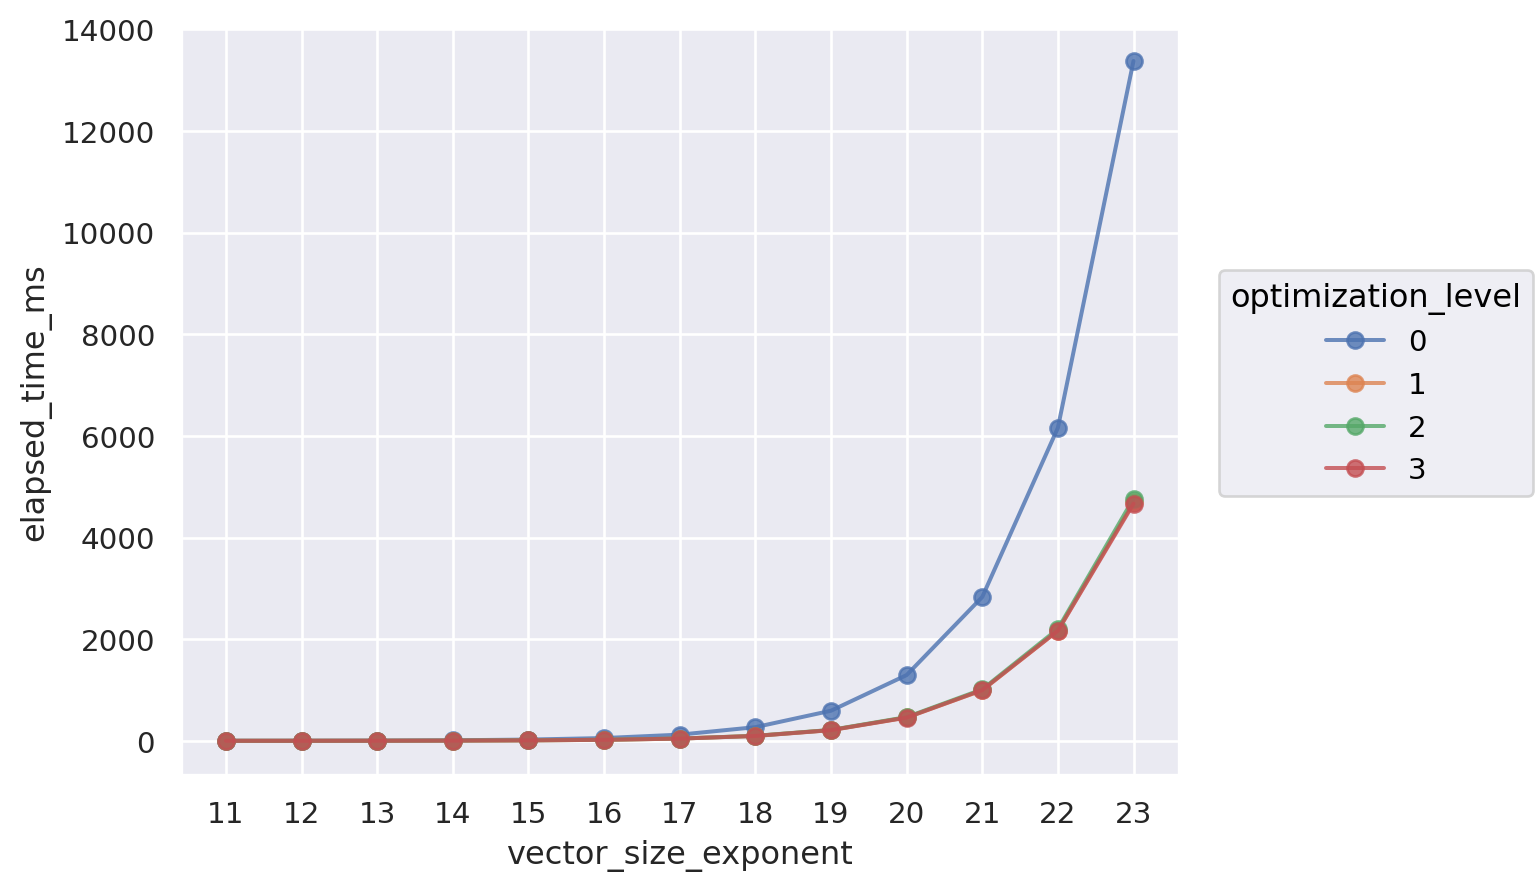

In [5]:
(
    so.Plot(
        cpu_exec_df,
        # cpu_exec_df[(cpu_exec_df["optimization_level"] != "0") | (cpu_exec_df["vector_size_exponent"] <= 22)],
        x="vector_size_exponent",
        y="elapsed_time_ms",
        color="optimization_level",
    )
    .add(so.Line(marker="o", alpha=0.8), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1)
    )
)

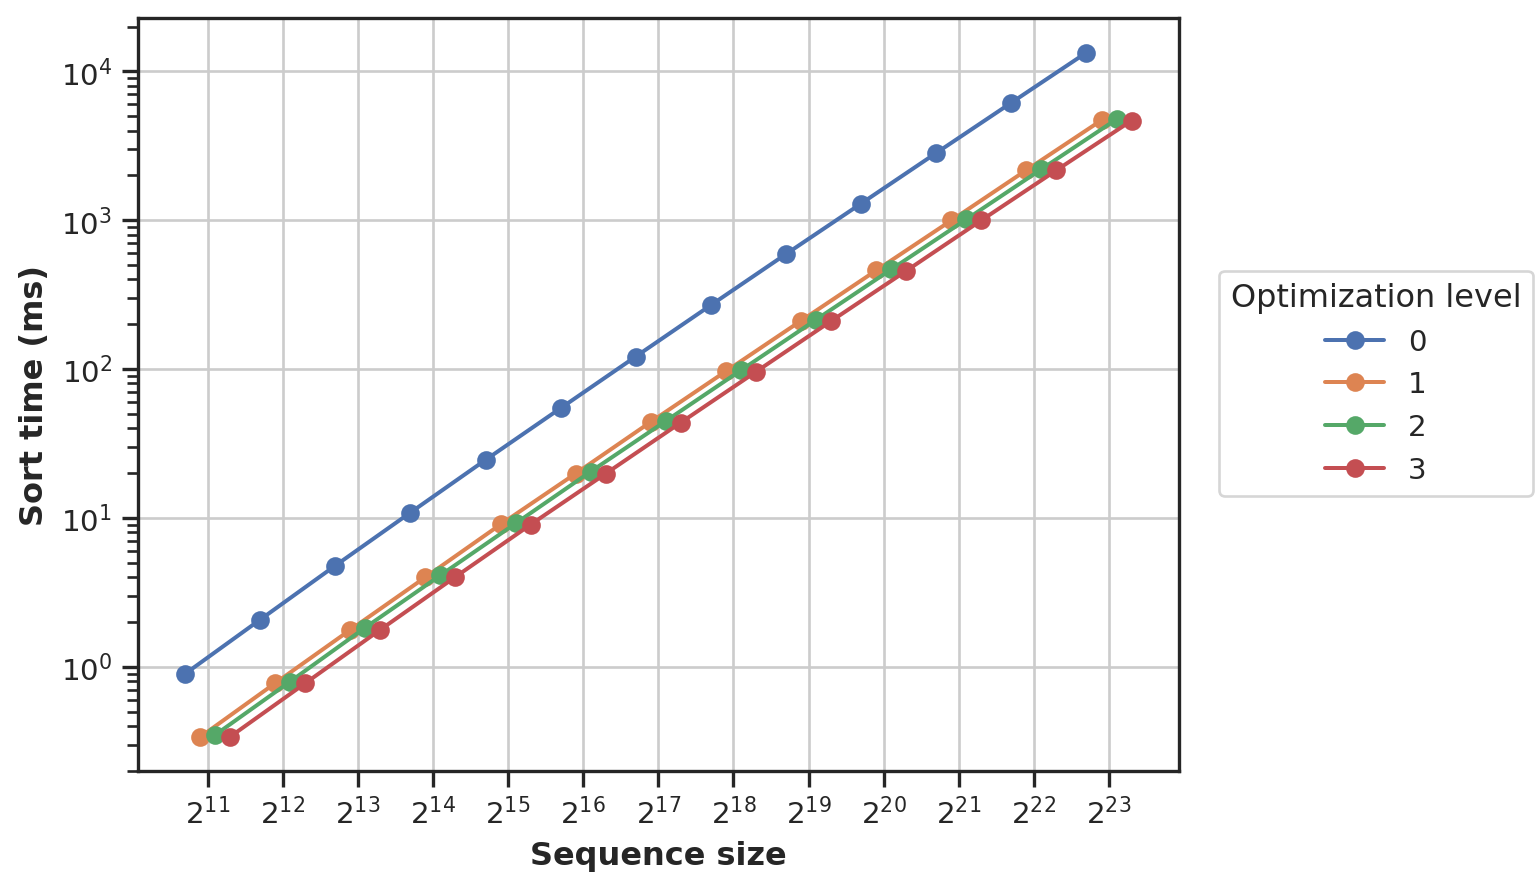

In [6]:
(
    so.Plot(
        cpu_exec_df,
        x="vector_size_exponent",
        y="elapsed_time_ms",
        color="optimization_level",
    )
    .add(so.Line(marker="o"), so.Agg(), so.Dodge())
    .scale(
        x=so.Continuous().tick(every=1).label(like="$2^{{{x:.0f}}}$"),
        y="log",
        # y="symlog",
    )
    .label(
        x="Sequence size",
        y="Sort time (ms)",
        color="Optimization level",
    )
    .theme(theme_dict)
    .save("plot1_cpu_implementations.svg", bbox_inches='tight')
)

# GPU implementations

In [7]:
algorithms = [
    "global_memory_step_by_step",
    "global_memory_grouped_steps",
    "shared_memory_grouped_steps",
    "shared_memory_grouped_steps_warp",
]

dfs = []
for algorithm in algorithms:
    df = pd.read_csv(f"{CSV_PATH}/{algorithm}.csv")
    df["algorithm"] = algorithm

    dfs.append(df)

gpu_exec_df = pd.concat(dfs)
gpu_exec_df

vector_size_exponent  vector_size  threads_per_block_exponent  \
0                       11         2048                           5   
1                       11         2048                           5   
2                       11         2048                           5   
3                       11         2048                           5   
4                       11         2048                           5   
...                    ...          ...                         ...   
4215                    26     67108864                          10   
4216                    26     67108864                          10   
4217                    26     67108864                          10   
4218                    26     67108864                          10   
4219                    26     67108864                          10   

      threads_per_block  comparators_per_thread_exponent  \
0                    32                                0   
1                    32                                0   
2                    32                                0   
3                    32                                0   
4                    32                                0   
...                 ...                              ...   
4215               1024                                2   
4216               1024                                2   
4217               1024                                2   
4218               1024                                2   
4219               1024                                2   

      comparators_per_thread  values_per_block  blocks_per_grid  repetition  \
0                          1                64               32           1   
1                          1                64               32           2   
2                          1                64               32           3   
3                          1                64               32           4   
4                          1                64               32           5   
...                      ...               ...              ...         ...   
4215                       4              8192             8192           6   
4216                       4              8192             8192           7   
4217                       4              8192             8192           8   
4218                       4              8192             8192           9   
4219                       4              8192             8192          10   

      elapsed_time_ms                         algorithm  
0            0.293888        global_memory_step_by_step  
1            0.288768        global_memory_step_by_step  
2            0.289792        global_memory_step_by_step  
3            0.287744        global_memory_step_by_step  
4            0.288768        global_memory_step_by_step  
...               ...                               ...  
4215        85.629800  shared_memory_grouped_steps_warp  
4216        85.645900  shared_memory_grouped_steps_warp  
4217        85.627300  shared_memory_grouped_steps_warp  
4218        85.637200  shared_memory_grouped_steps_warp  
4219        85.672700  shared_memory_grouped_steps_warp  

[16880 rows x 11 columns]

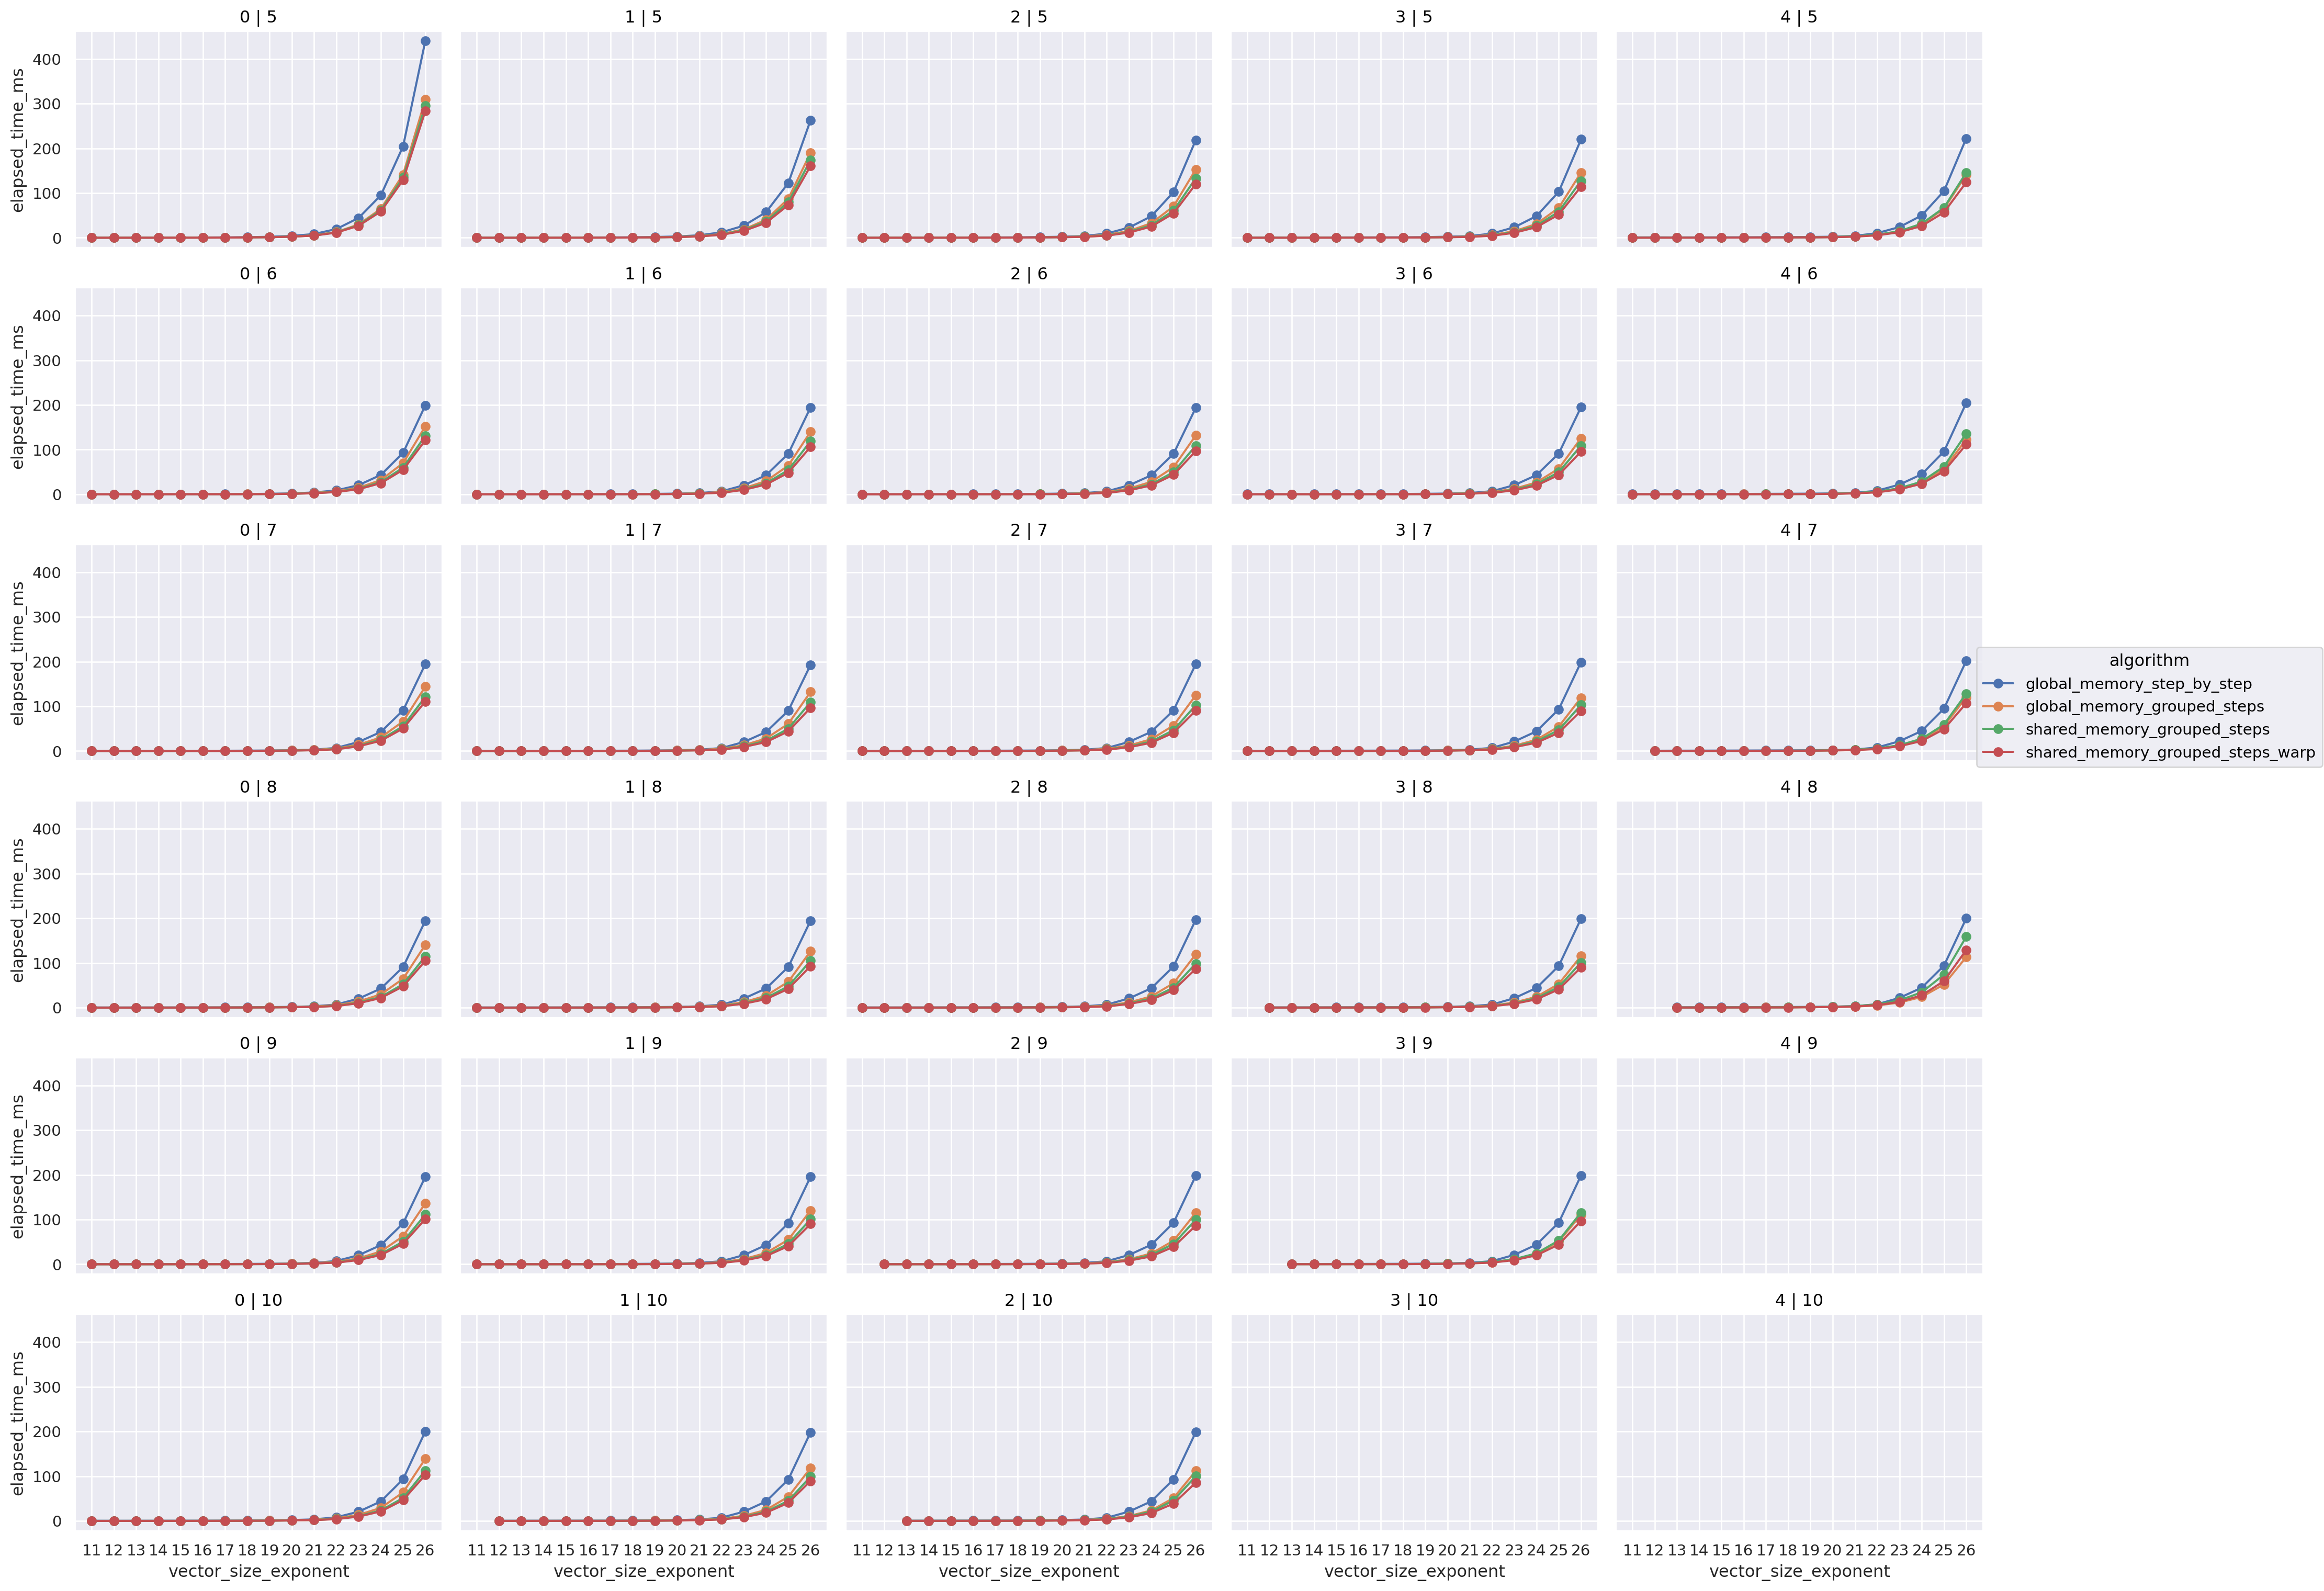

In [8]:
# this plot contains all parameters that can be configured (algorithm, vector_size_exponent, threads_per_block_exponent, comparators_per_thread_exponent)
(
    so.Plot(
        gpu_exec_df,
        x="vector_size_exponent", y="elapsed_time_ms", color="algorithm"
    )
    .facet(row="threads_per_block_exponent", col="comparators_per_thread_exponent")
    .layout(size=(20, 16))
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

## Effects of `vector_size`

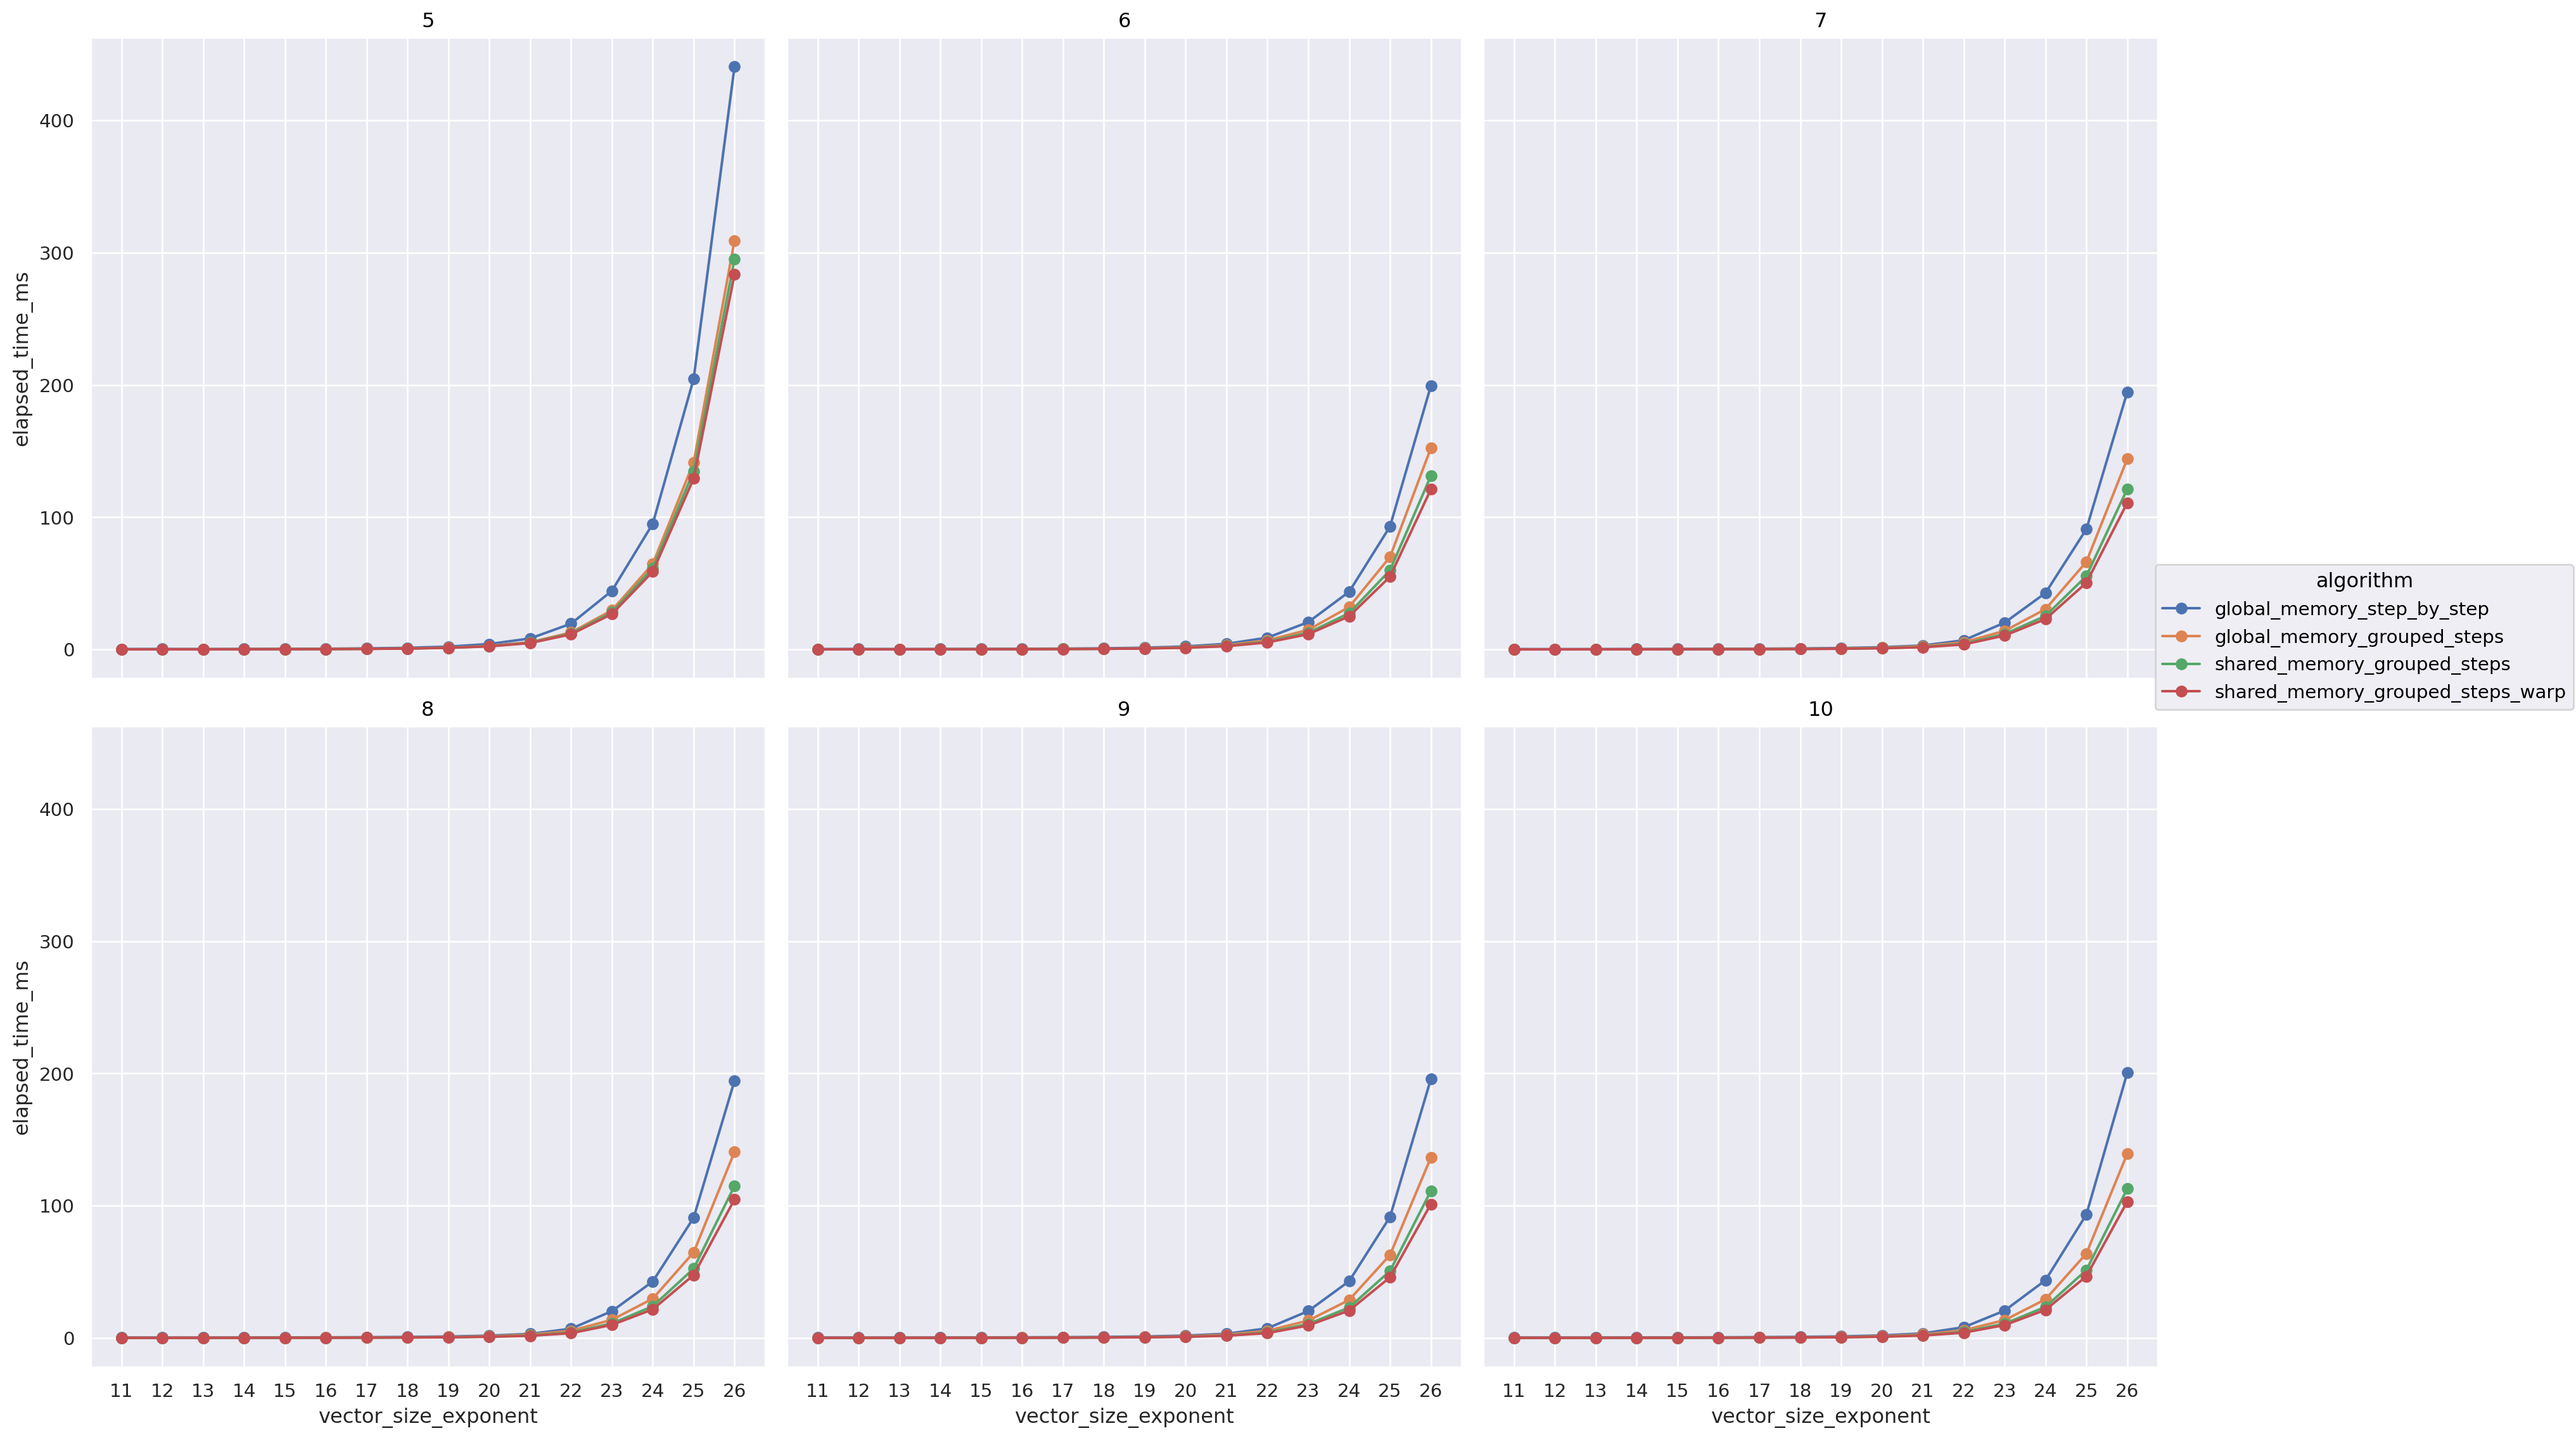

In [9]:
(
    so.Plot(
        gpu_exec_df[gpu_exec_df["comparators_per_thread_exponent"] == 0],
        x="vector_size_exponent", y="elapsed_time_ms", color="algorithm"
    )
    .facet(col="threads_per_block_exponent", wrap=3)
    .layout(size=(18, 12))
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

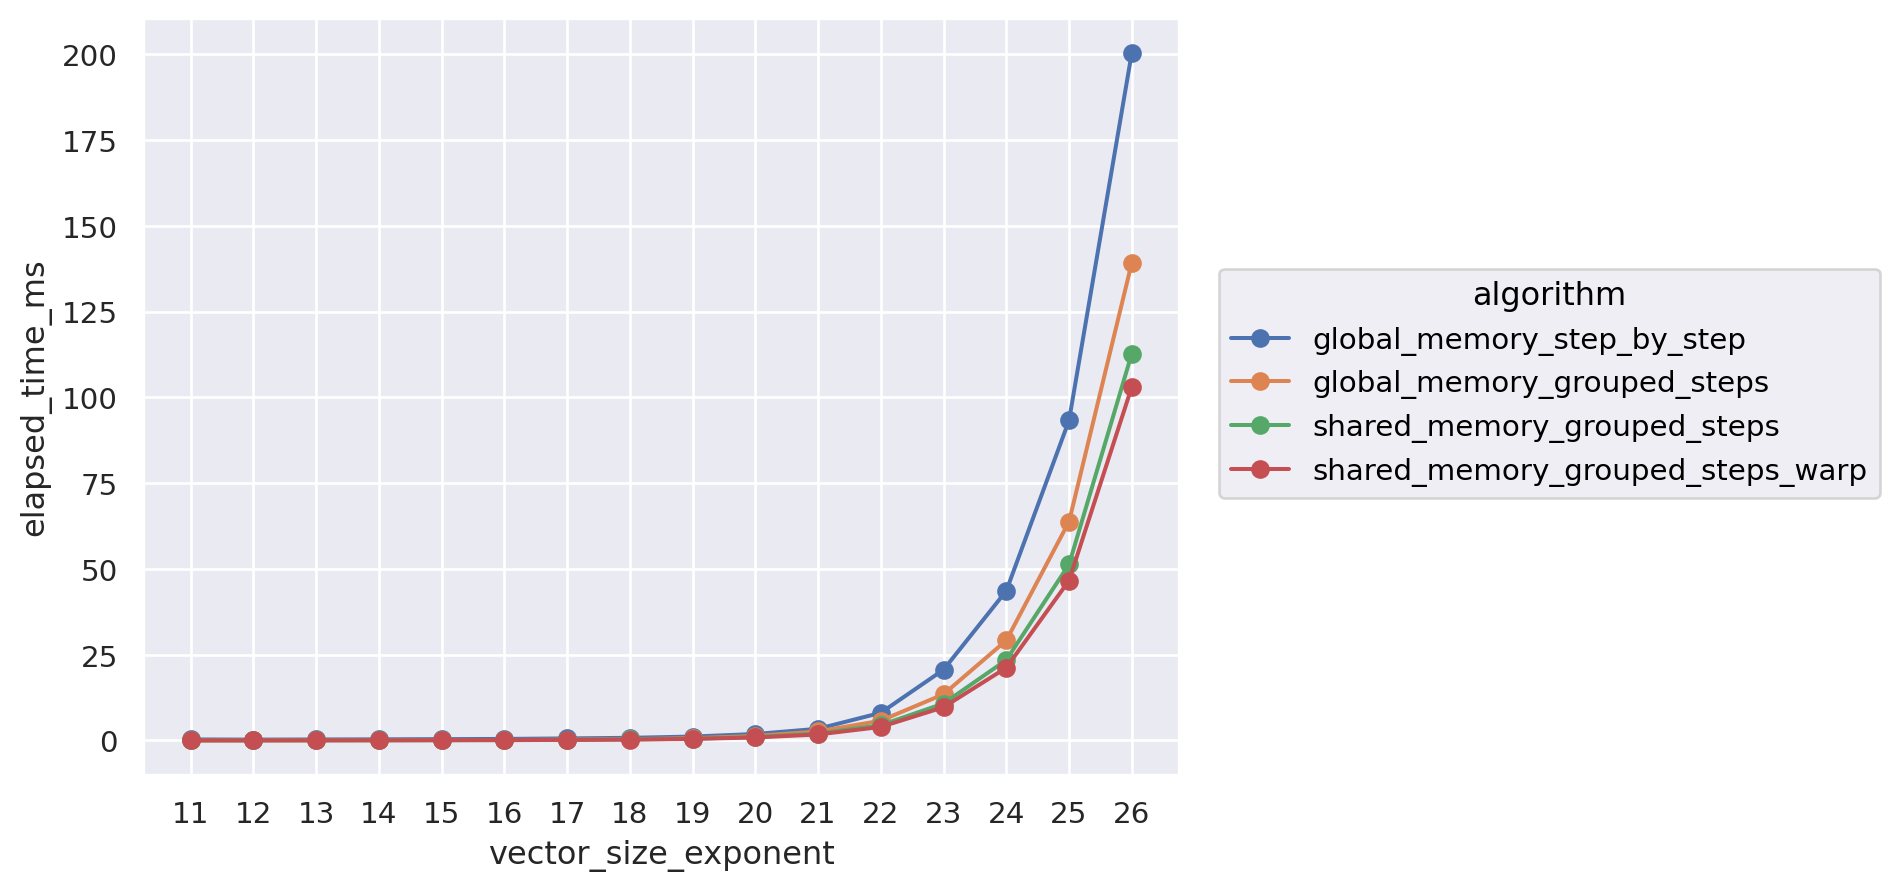

In [10]:
# execution time as the vector size increases
(
    so.Plot(
        gpu_exec_df[
            (gpu_exec_df["threads_per_block_exponent"] == 10)
            & (gpu_exec_df["comparators_per_thread_exponent"] == 0)
        ],
        x="vector_size_exponent",
        y="elapsed_time_ms",
        color="algorithm",
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

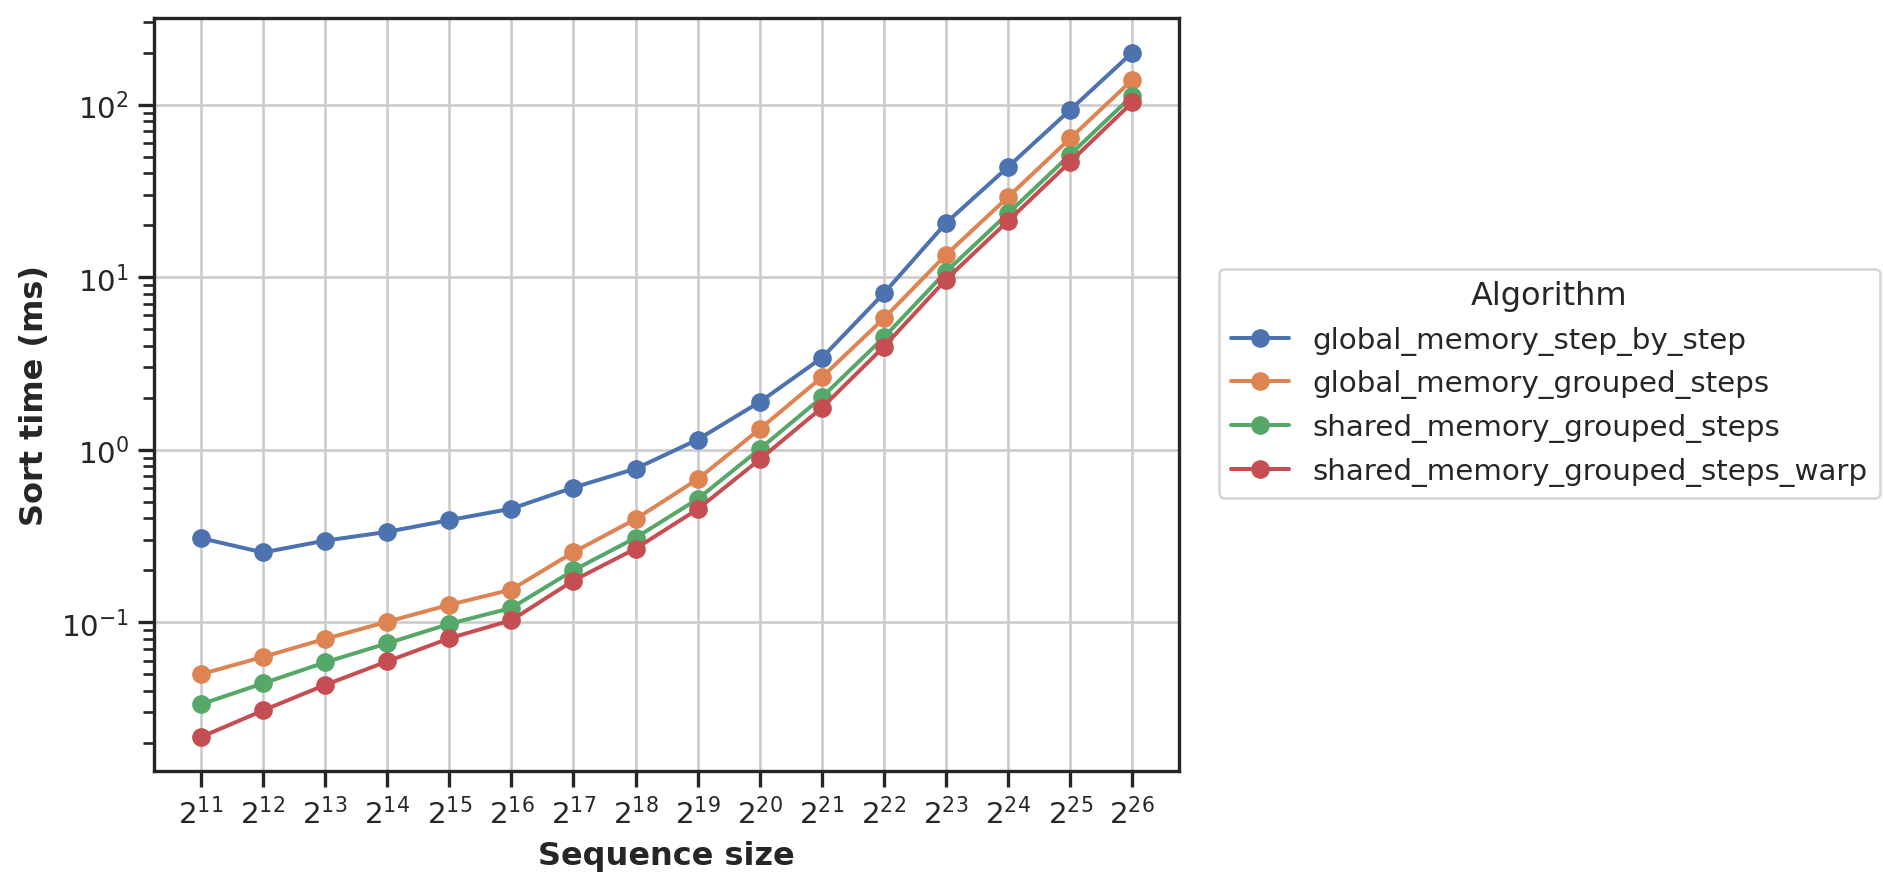

In [11]:
# execution time as the vector size increases
(
    so.Plot(
        gpu_exec_df[
            (gpu_exec_df["threads_per_block_exponent"] == 10)
            & (gpu_exec_df["comparators_per_thread_exponent"] == 0)
        ],
        x="vector_size_exponent",
        y="elapsed_time_ms",
        color="algorithm",
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1).label(like="$2^{{{x:.0f}}}$"),
        y="log",
        # y="symlog",
    )
    .label(
        x="Sequence size",
        y="Sort time (ms)",
        color="Algorithm",
    )
    .theme(theme_dict)
    .save("plot2_gpu_implementations.svg", bbox_inches='tight')
)

In [12]:
gpu_and_cpu_exec_df = pd.concat([
    gpu_exec_df[
            (gpu_exec_df["threads_per_block_exponent"] == 10)
            & (gpu_exec_df["comparators_per_thread_exponent"] == 0)
    ],
    cpu_exec_df[cpu_exec_df["optimization_level"] == "3"]
])
gpu_and_cpu_exec_df["algorithm"] = gpu_and_cpu_exec_df["algorithm"].replace("bitonic_sort_cpu_measure", "cpu_implementation_O3")
gpu_and_cpu_exec_df

vector_size_exponent  vector_size  threads_per_block_exponent  \
190                    11         2048                        10.0   
191                    11         2048                        10.0   
192                    11         2048                        10.0   
193                    11         2048                        10.0   
194                    11         2048                        10.0   
..                    ...          ...                         ...   
125                    23      8388608                         NaN   
126                    23      8388608                         NaN   
127                    23      8388608                         NaN   
128                    23      8388608                         NaN   
129                    23      8388608                         NaN   

     threads_per_block  comparators_per_thread_exponent  \
190             1024.0                              0.0   
191             1024.0                              0.0   
192             1024.0                              0.0   
193             1024.0                              0.0   
194             1024.0                              0.0   
..                 ...                              ...   
125                NaN                              NaN   
126                NaN                              NaN   
127                NaN                              NaN   
128                NaN                              NaN   
129                NaN                              NaN   

     comparators_per_thread  values_per_block  blocks_per_grid  repetition  \
190                     1.0            2048.0              1.0           1   
191                     1.0            2048.0              1.0           2   
192                     1.0            2048.0              1.0           3   
193                     1.0            2048.0              1.0           4   
194                     1.0            2048.0              1.0           5   
..                      ...               ...              ...         ...   
125                     NaN               NaN              NaN           6   
126                     NaN               NaN              NaN           7   
127                     NaN               NaN              NaN           8   
128                     NaN               NaN              NaN           9   
129                     NaN               NaN              NaN          10   

     elapsed_time_ms                   algorithm optimization_level  
190         0.307200  global_memory_step_by_step                NaN  
191         0.308224  global_memory_step_by_step                NaN  
192         0.308224  global_memory_step_by_step                NaN  
193         0.307200  global_memory_step_by_step                NaN  
194         0.306176  global_memory_step_by_step                NaN  
..               ...                         ...                ...  
125      4662.530000       cpu_implementation_O3                  3  
126      4665.350000       cpu_implementation_O3                  3  
127      4664.350000       cpu_implementation_O3                  3  
128      4665.380000       cpu_implementation_O3                  3  
129      4670.320000       cpu_implementation_O3                  3  

[770 rows x 12 columns]

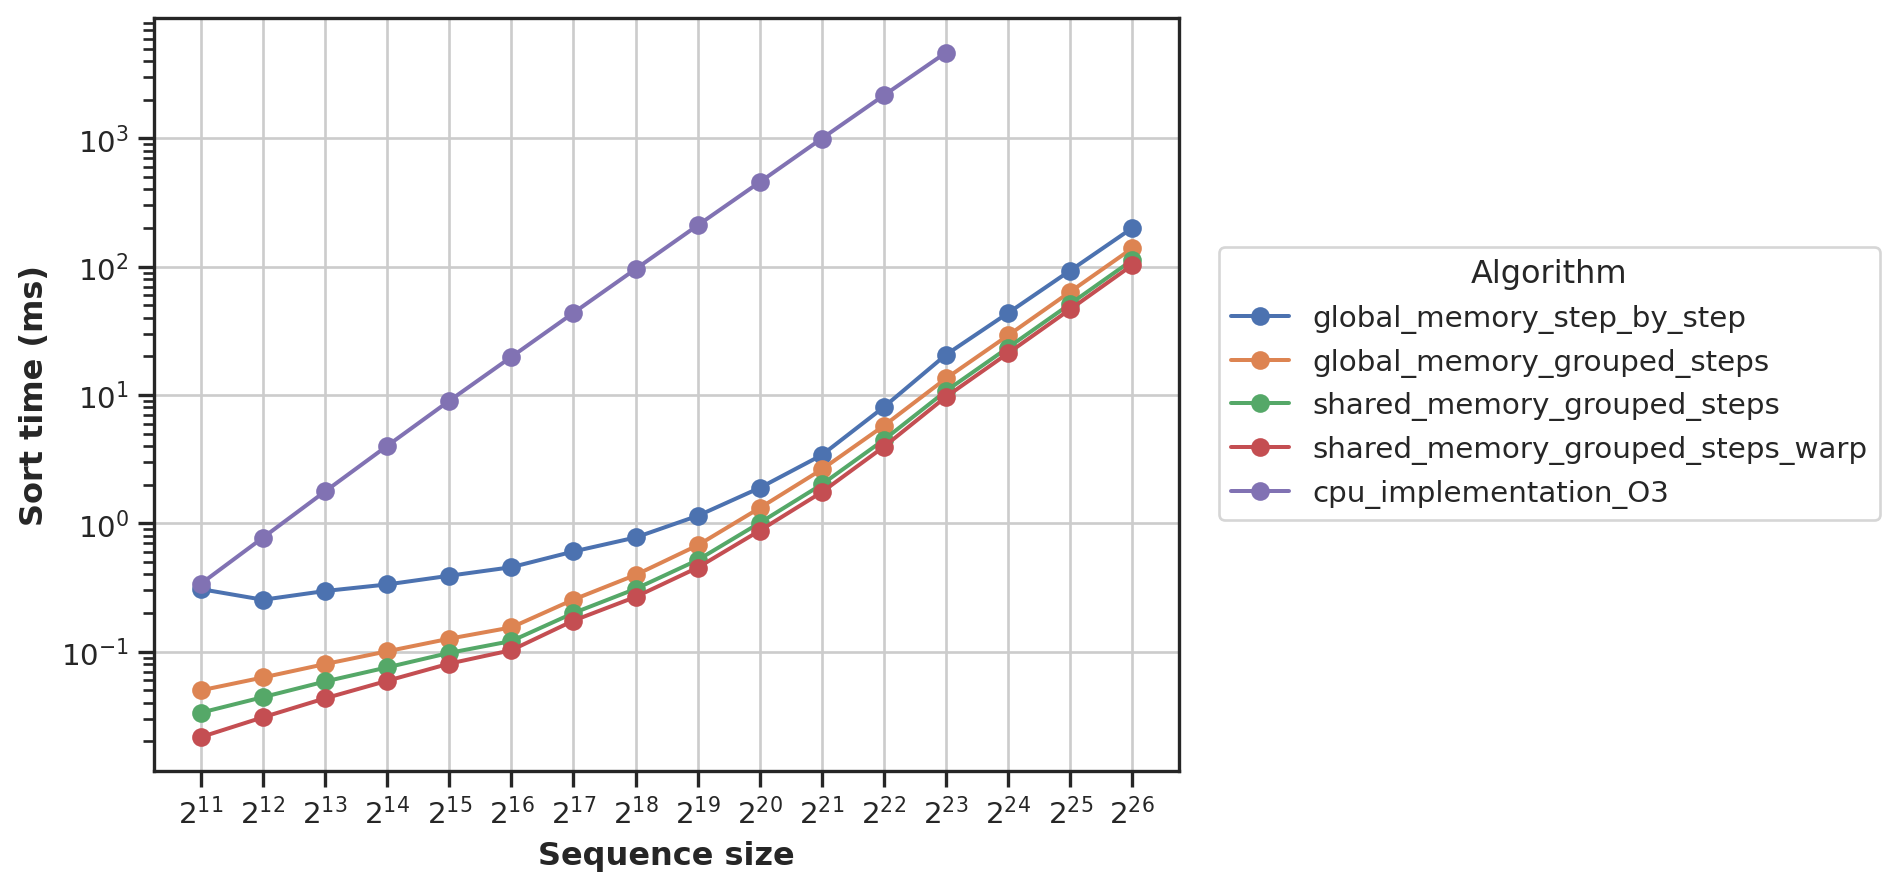

In [13]:
# execution time as the vector size increases (with cpu implementation)
(
    so.Plot(
        gpu_and_cpu_exec_df,
        x="vector_size_exponent",
        y="elapsed_time_ms",
        color="algorithm",
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1).label(like="$2^{{{x:.0f}}}$"),
        y="log",
        # y="symlog",
    )
    .label(
        x="Sequence size",
        y="Sort time (ms)",
        color="Algorithm",
    )
    .theme(theme_dict)
    .save("plot3_gpu_and_cpu_implementations.svg", bbox_inches='tight')
)

In [14]:
gpu_exec_df["elapsed_time_s"] = gpu_exec_df["elapsed_time_ms"] / 1000
gpu_exec_df["sorting_rate"] = gpu_exec_df["vector_size"] / gpu_exec_df["elapsed_time_s"]
gpu_exec_df

vector_size_exponent  vector_size  threads_per_block_exponent  \
0                       11         2048                           5   
1                       11         2048                           5   
2                       11         2048                           5   
3                       11         2048                           5   
4                       11         2048                           5   
...                    ...          ...                         ...   
4215                    26     67108864                          10   
4216                    26     67108864                          10   
4217                    26     67108864                          10   
4218                    26     67108864                          10   
4219                    26     67108864                          10   

      threads_per_block  comparators_per_thread_exponent  \
0                    32                                0   
1                    32                                0   
2                    32                                0   
3                    32                                0   
4                    32                                0   
...                 ...                              ...   
4215               1024                                2   
4216               1024                                2   
4217               1024                                2   
4218               1024                                2   
4219               1024                                2   

      comparators_per_thread  values_per_block  blocks_per_grid  repetition  \
0                          1                64               32           1   
1                          1                64               32           2   
2                          1                64               32           3   
3                          1                64               32           4   
4                          1                64               32           5   
...                      ...               ...              ...         ...   
4215                       4              8192             8192           6   
4216                       4              8192             8192           7   
4217                       4              8192             8192           8   
4218                       4              8192             8192           9   
4219                       4              8192             8192          10   

      elapsed_time_ms                         algorithm  elapsed_time_s  \
0            0.293888        global_memory_step_by_step        0.000294   
1            0.288768        global_memory_step_by_step        0.000289   
2            0.289792        global_memory_step_by_step        0.000290   
3            0.287744        global_memory_step_by_step        0.000288   
4            0.288768        global_memory_step_by_step        0.000289   
...               ...                               ...             ...   
4215        85.629800  shared_memory_grouped_steps_warp        0.085630   
4216        85.645900  shared_memory_grouped_steps_warp        0.085646   
4217        85.627300  shared_memory_grouped_steps_warp        0.085627   
4218        85.637200  shared_memory_grouped_steps_warp        0.085637   
4219        85.672700  shared_memory_grouped_steps_warp        0.085673   

      sorting_rate  
0     6.968641e+06  
1     7.092199e+06  
2     7.067138e+06  
3     7.117438e+06  
4     7.092199e+06  
...            ...  
4215  7.837092e+08  
4216  7.835619e+08  
4217  7.837321e+08  
4218  7.836415e+08  
4219  7.833168e+08  

[16880 rows x 13 columns]

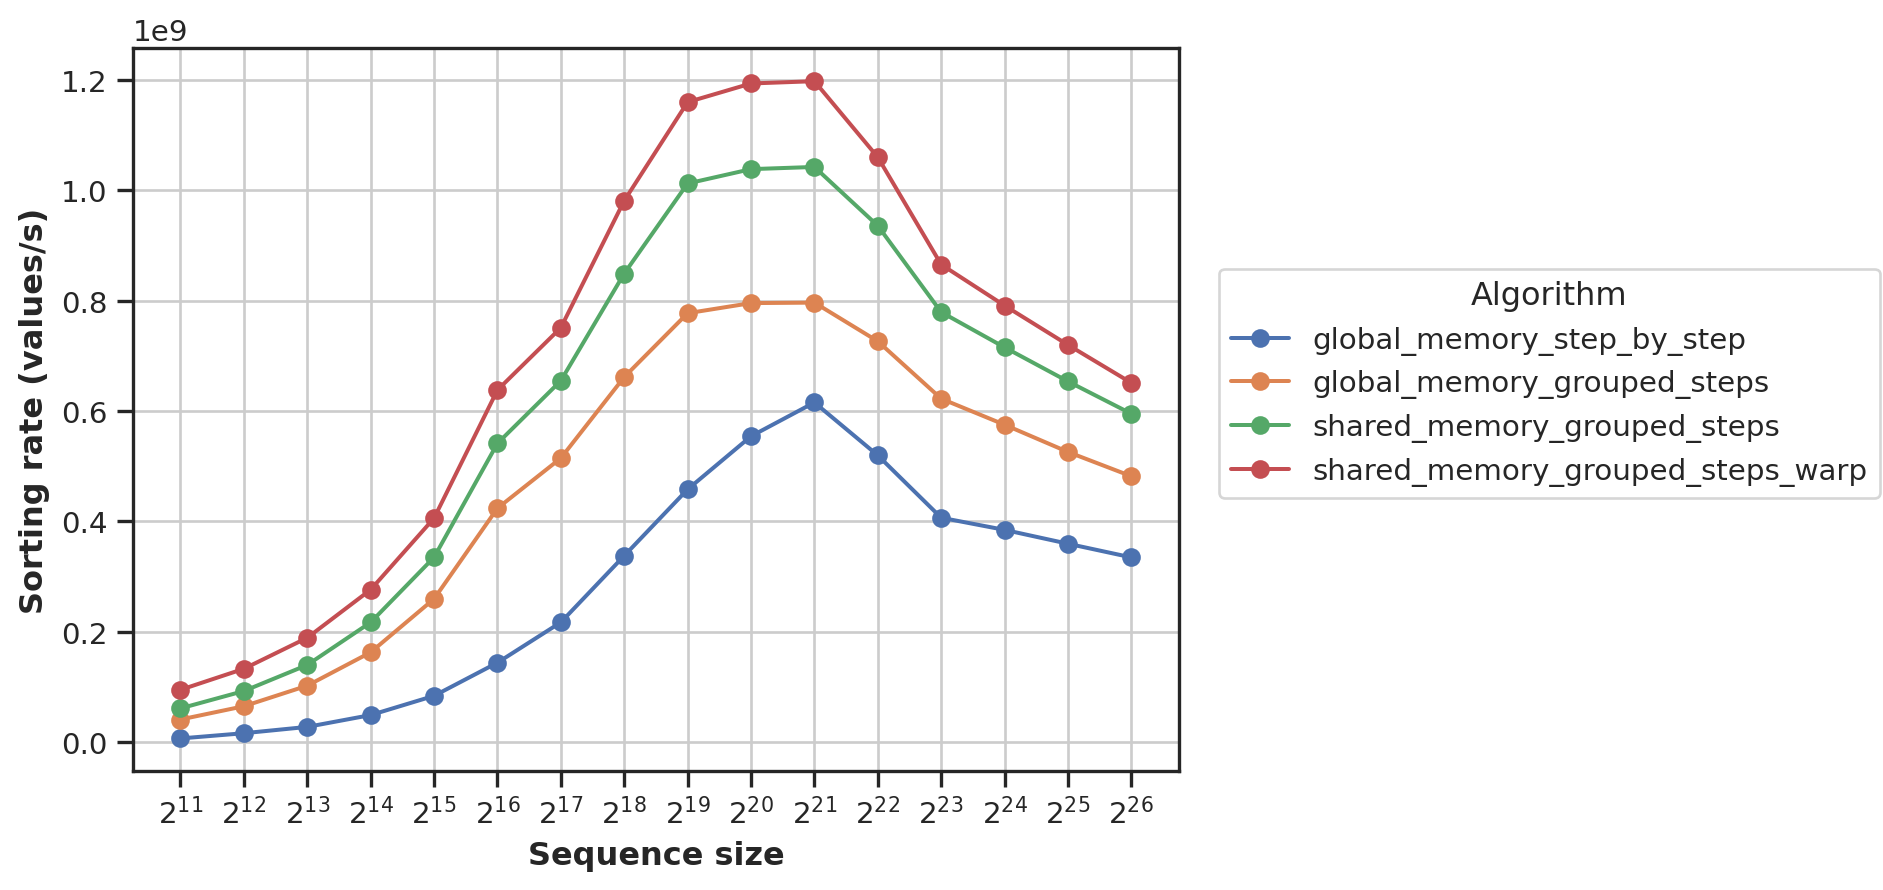

In [15]:
# sorting rate as the vector size increases
(
    so.Plot(
        gpu_exec_df[
            (gpu_exec_df["threads_per_block_exponent"] == 10)
            & (gpu_exec_df["comparators_per_thread_exponent"] == 0)
        ],
        x="vector_size_exponent",
        y="sorting_rate",
        color="algorithm",
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1).label(like="$2^{{{x:.0f}}}$"),
        # y="log",
        # y="symlog",
    )
    .label(
        x="Sequence size",
        y="Sorting rate (values/s)",
        color="Algorithm",
    )
    .theme(theme_dict)
    .save("plot4_gpu_implementations-sorting_rate.svg", bbox_inches='tight')
)

## Effects of `n_threads_per_block`

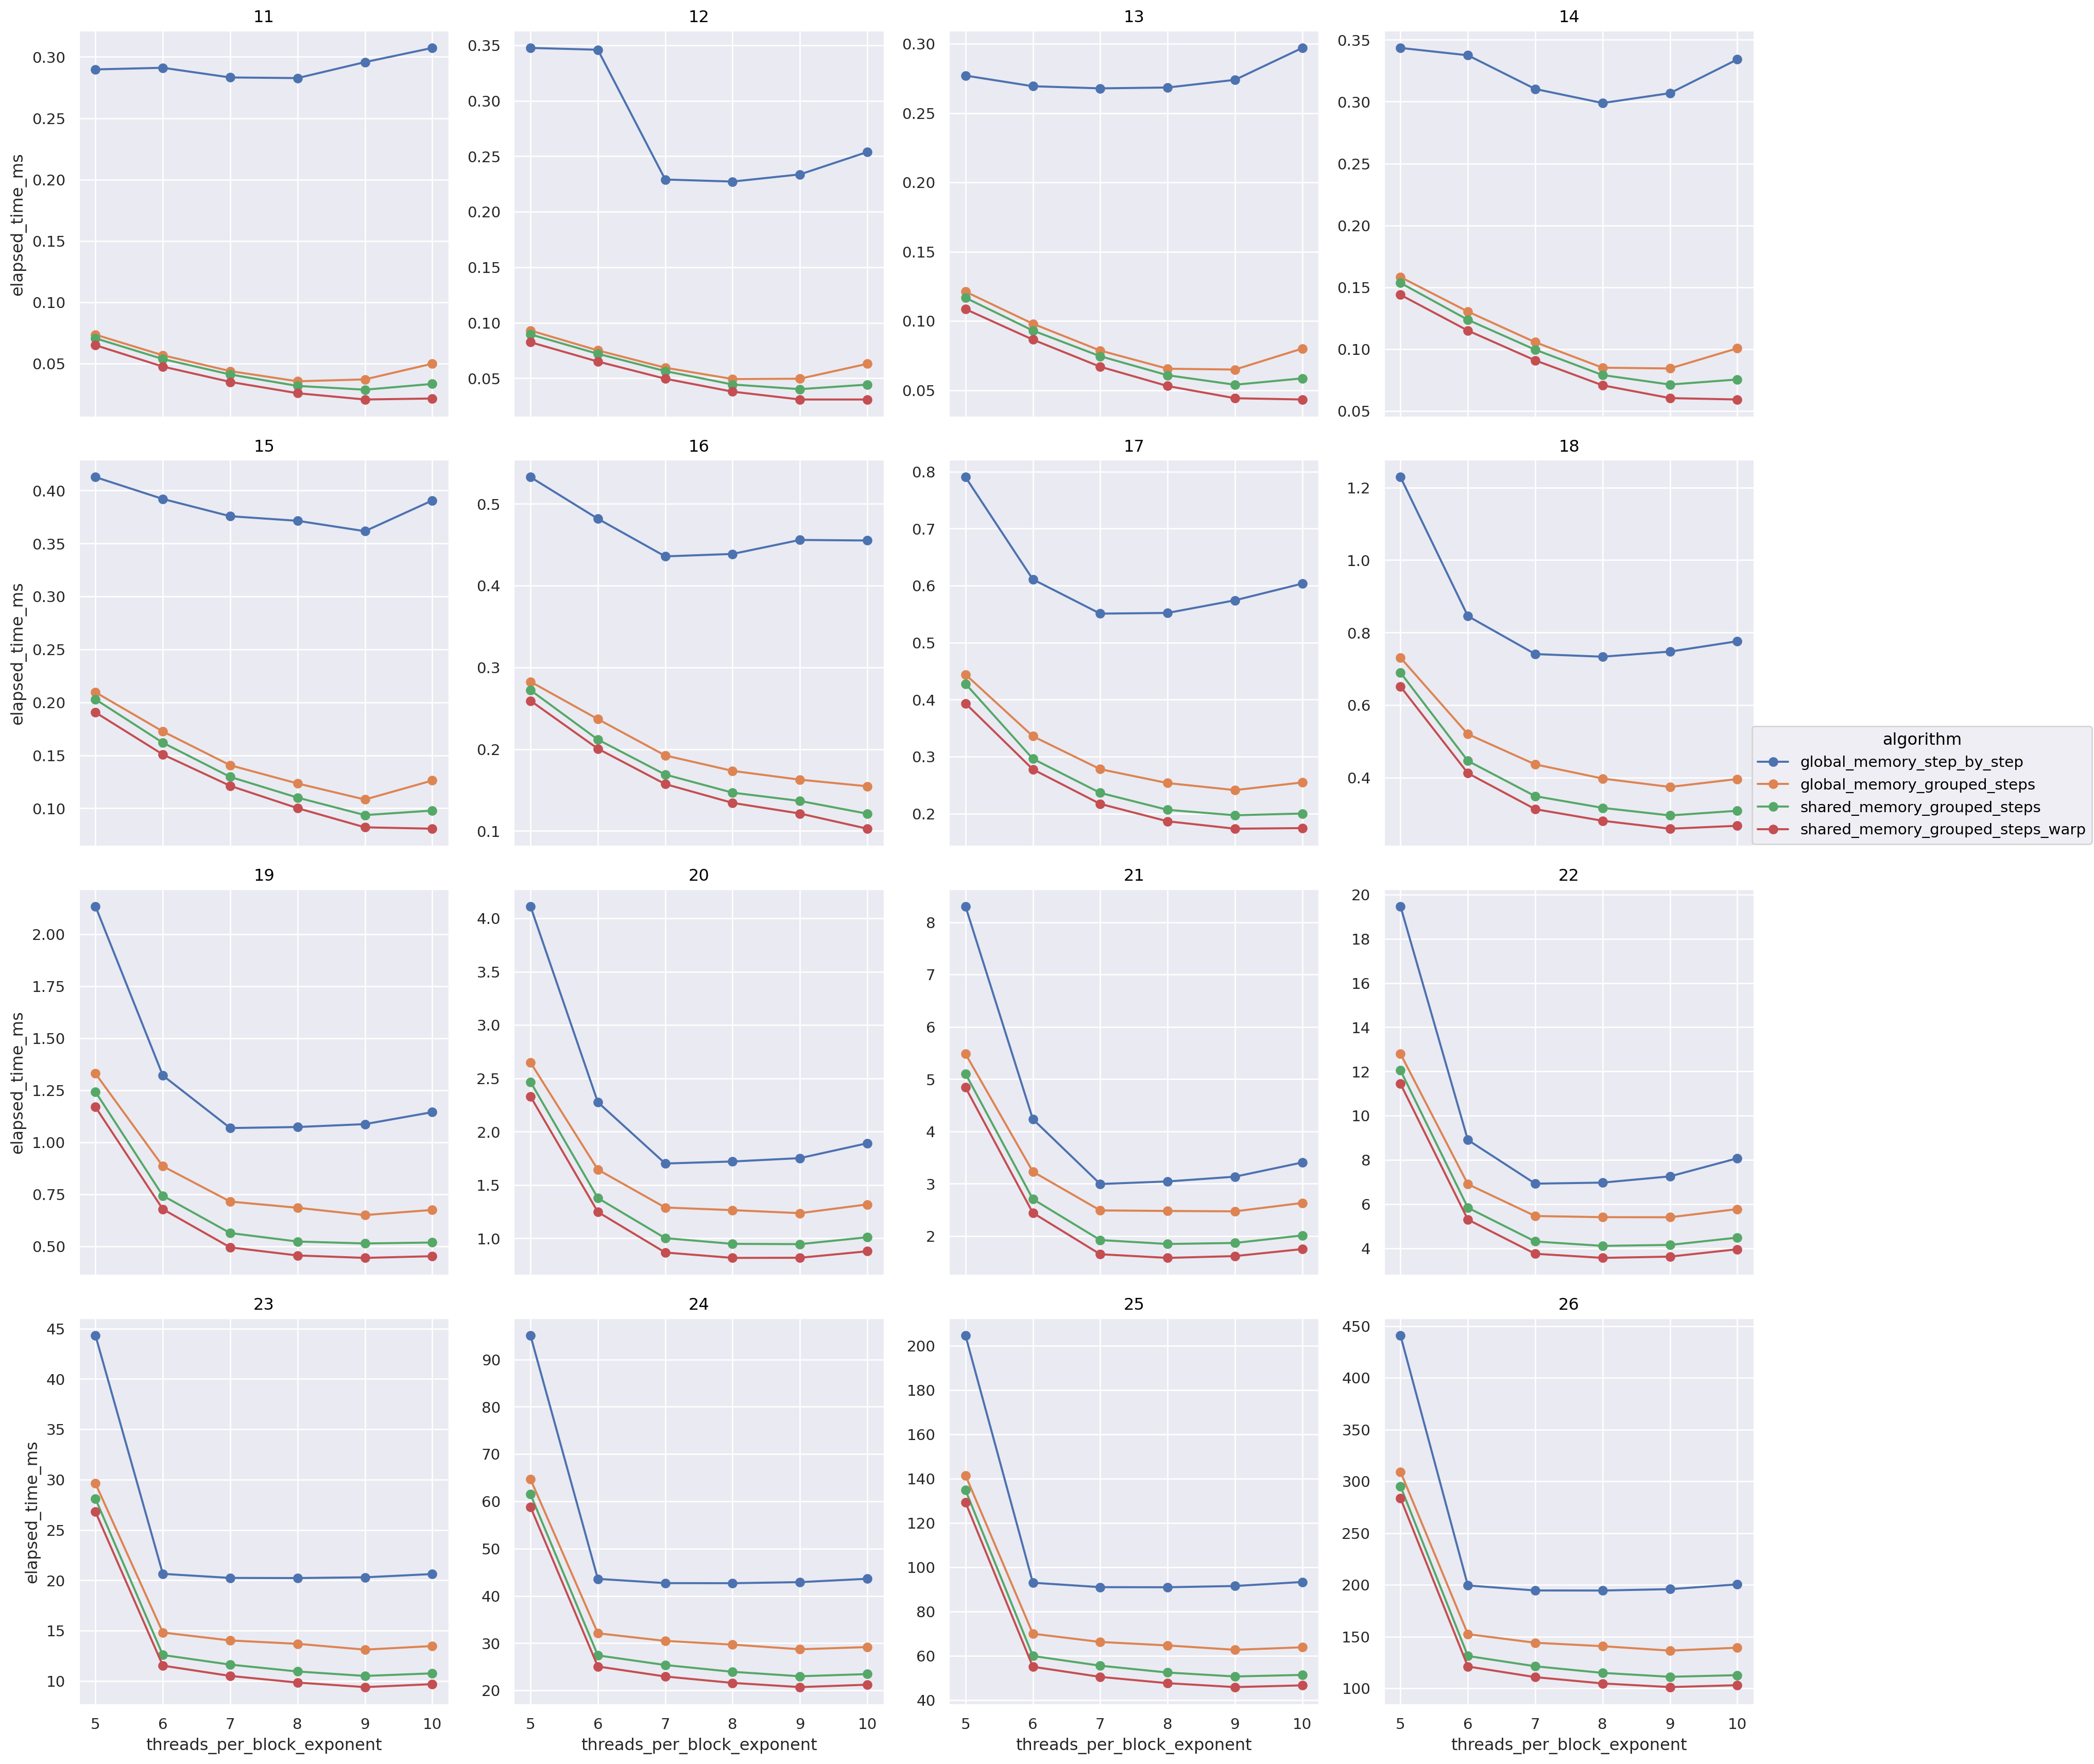

In [16]:
(
    so.Plot(
        gpu_exec_df[gpu_exec_df["comparators_per_thread_exponent"] == 0],
        x="threads_per_block_exponent",
        y="elapsed_time_ms",
        color="algorithm"
    )
    .facet(col="vector_size_exponent", wrap=4)
    .share(y=False)
    .layout(size=(18, 18))
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

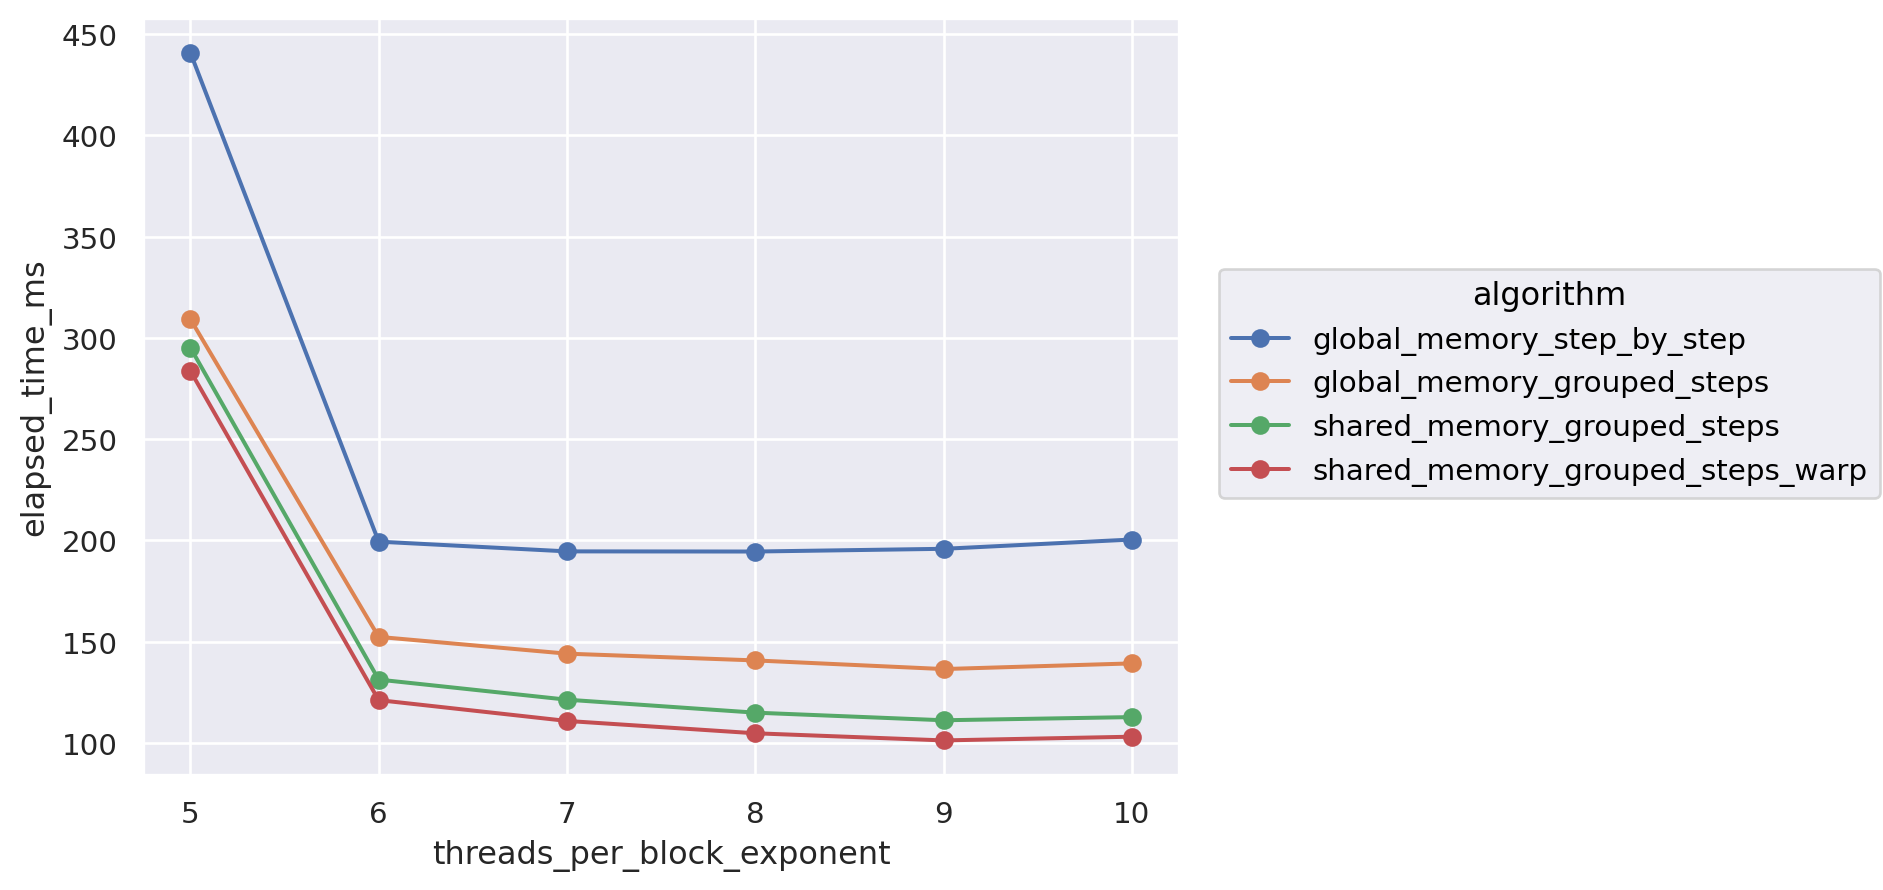

In [17]:
# effects of the number of threads per block
(
    so.Plot(
        gpu_exec_df[
            (gpu_exec_df["vector_size_exponent"] == 26)
            & (gpu_exec_df["comparators_per_thread_exponent"] == 0)
        ],
        x="threads_per_block_exponent", y="elapsed_time_ms", color="algorithm"
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

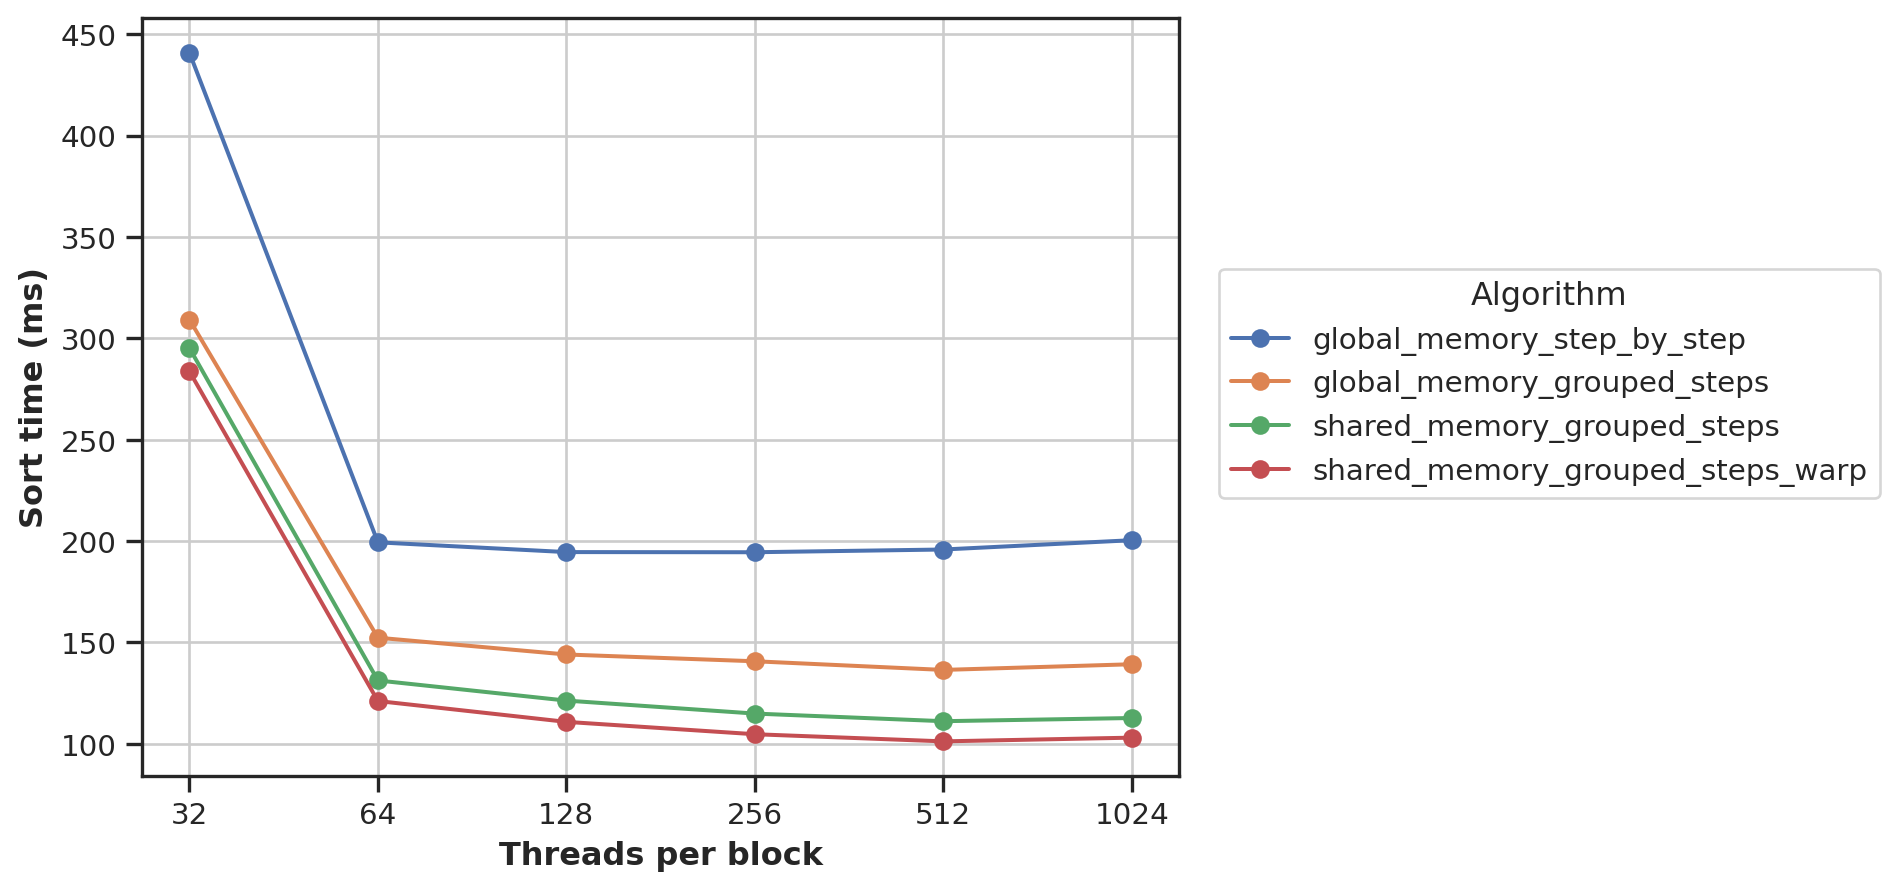

In [18]:
# effects of the number of threads per block
(
    so.Plot(
        gpu_exec_df[
            (gpu_exec_df["vector_size_exponent"] == 26)
            & (gpu_exec_df["comparators_per_thread_exponent"] == 0)
        ],
        x="threads_per_block_exponent", y="elapsed_time_ms", color="algorithm"
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1).label(like=lambda x, pos: int(2**x)),
    )
    .label(
        x="Threads per block",
        y="Sort time (ms)",
        color="Algorithm",
    )
    .theme(theme_dict)
    .save("plot5_gpu_implementations-threads_per_block.svg", bbox_inches='tight')
)

## Effects of `n_comparators_per_thread`

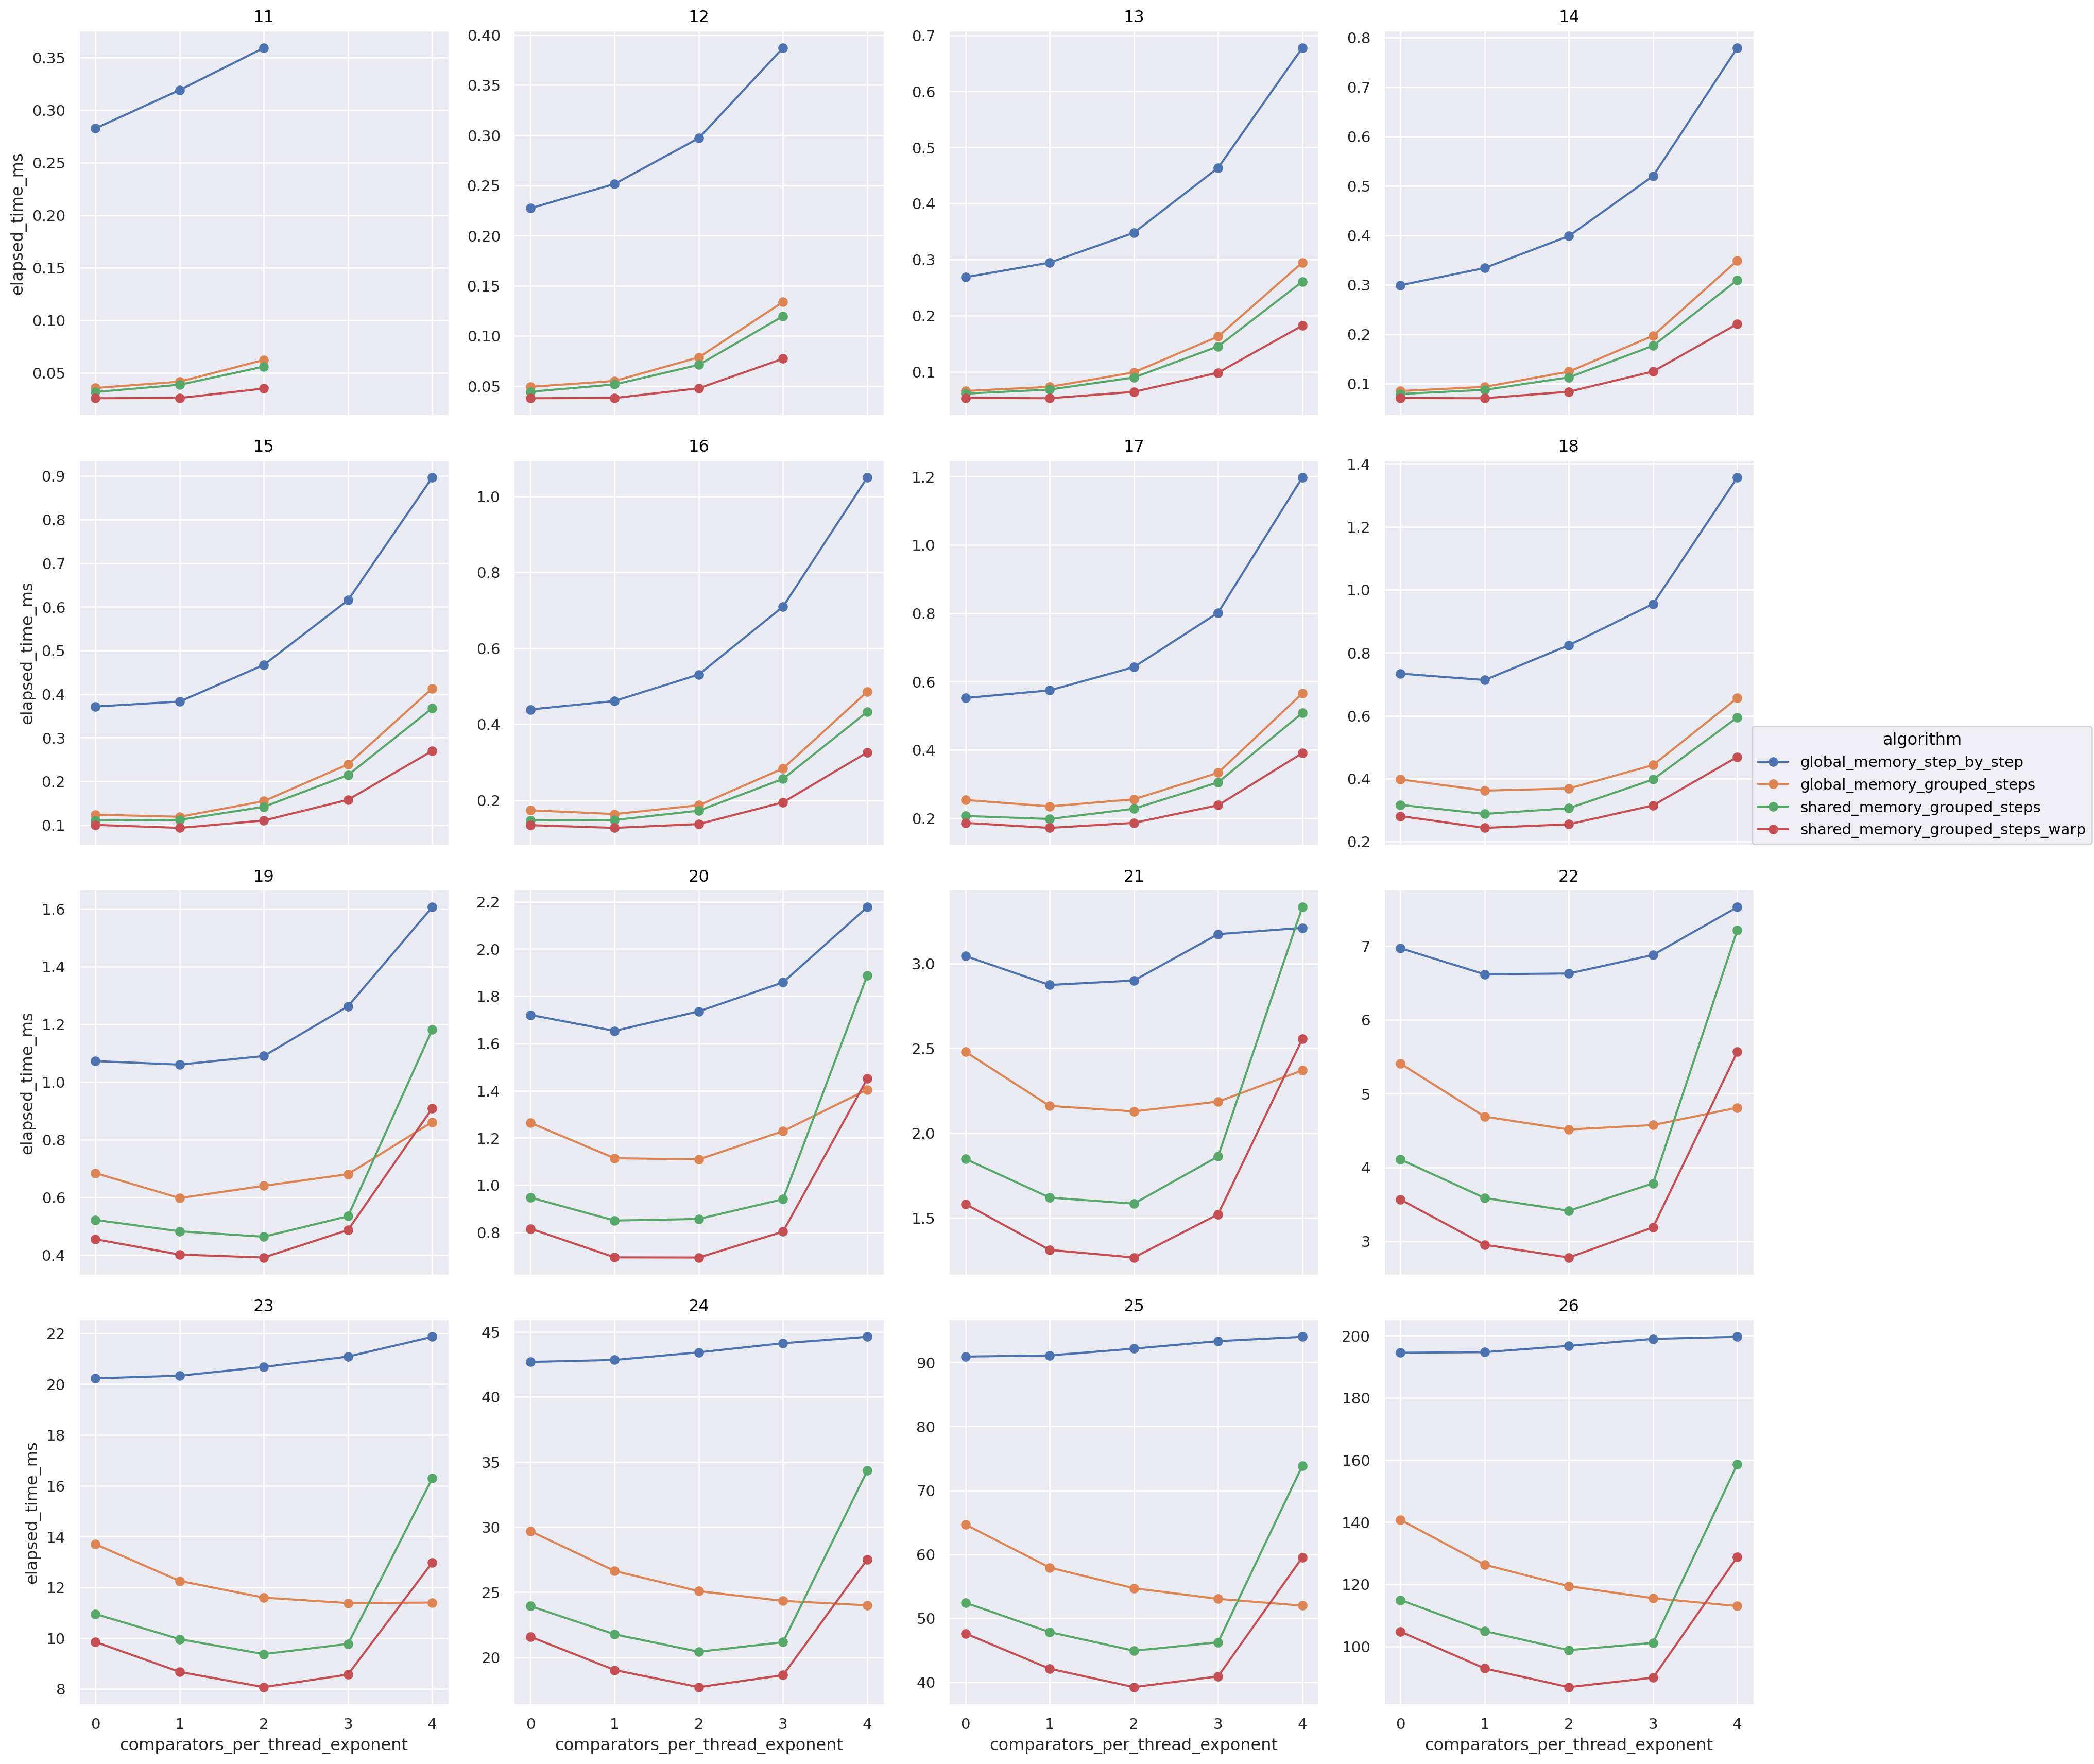

In [19]:
(
    so.Plot(
        gpu_exec_df[gpu_exec_df["threads_per_block_exponent"] == 8],
        x="comparators_per_thread_exponent",
        y="elapsed_time_ms",
        color="algorithm"
    )
    .facet(col="vector_size_exponent", wrap=4)
    .share(y=False)
    .layout(size=(18, 18))
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

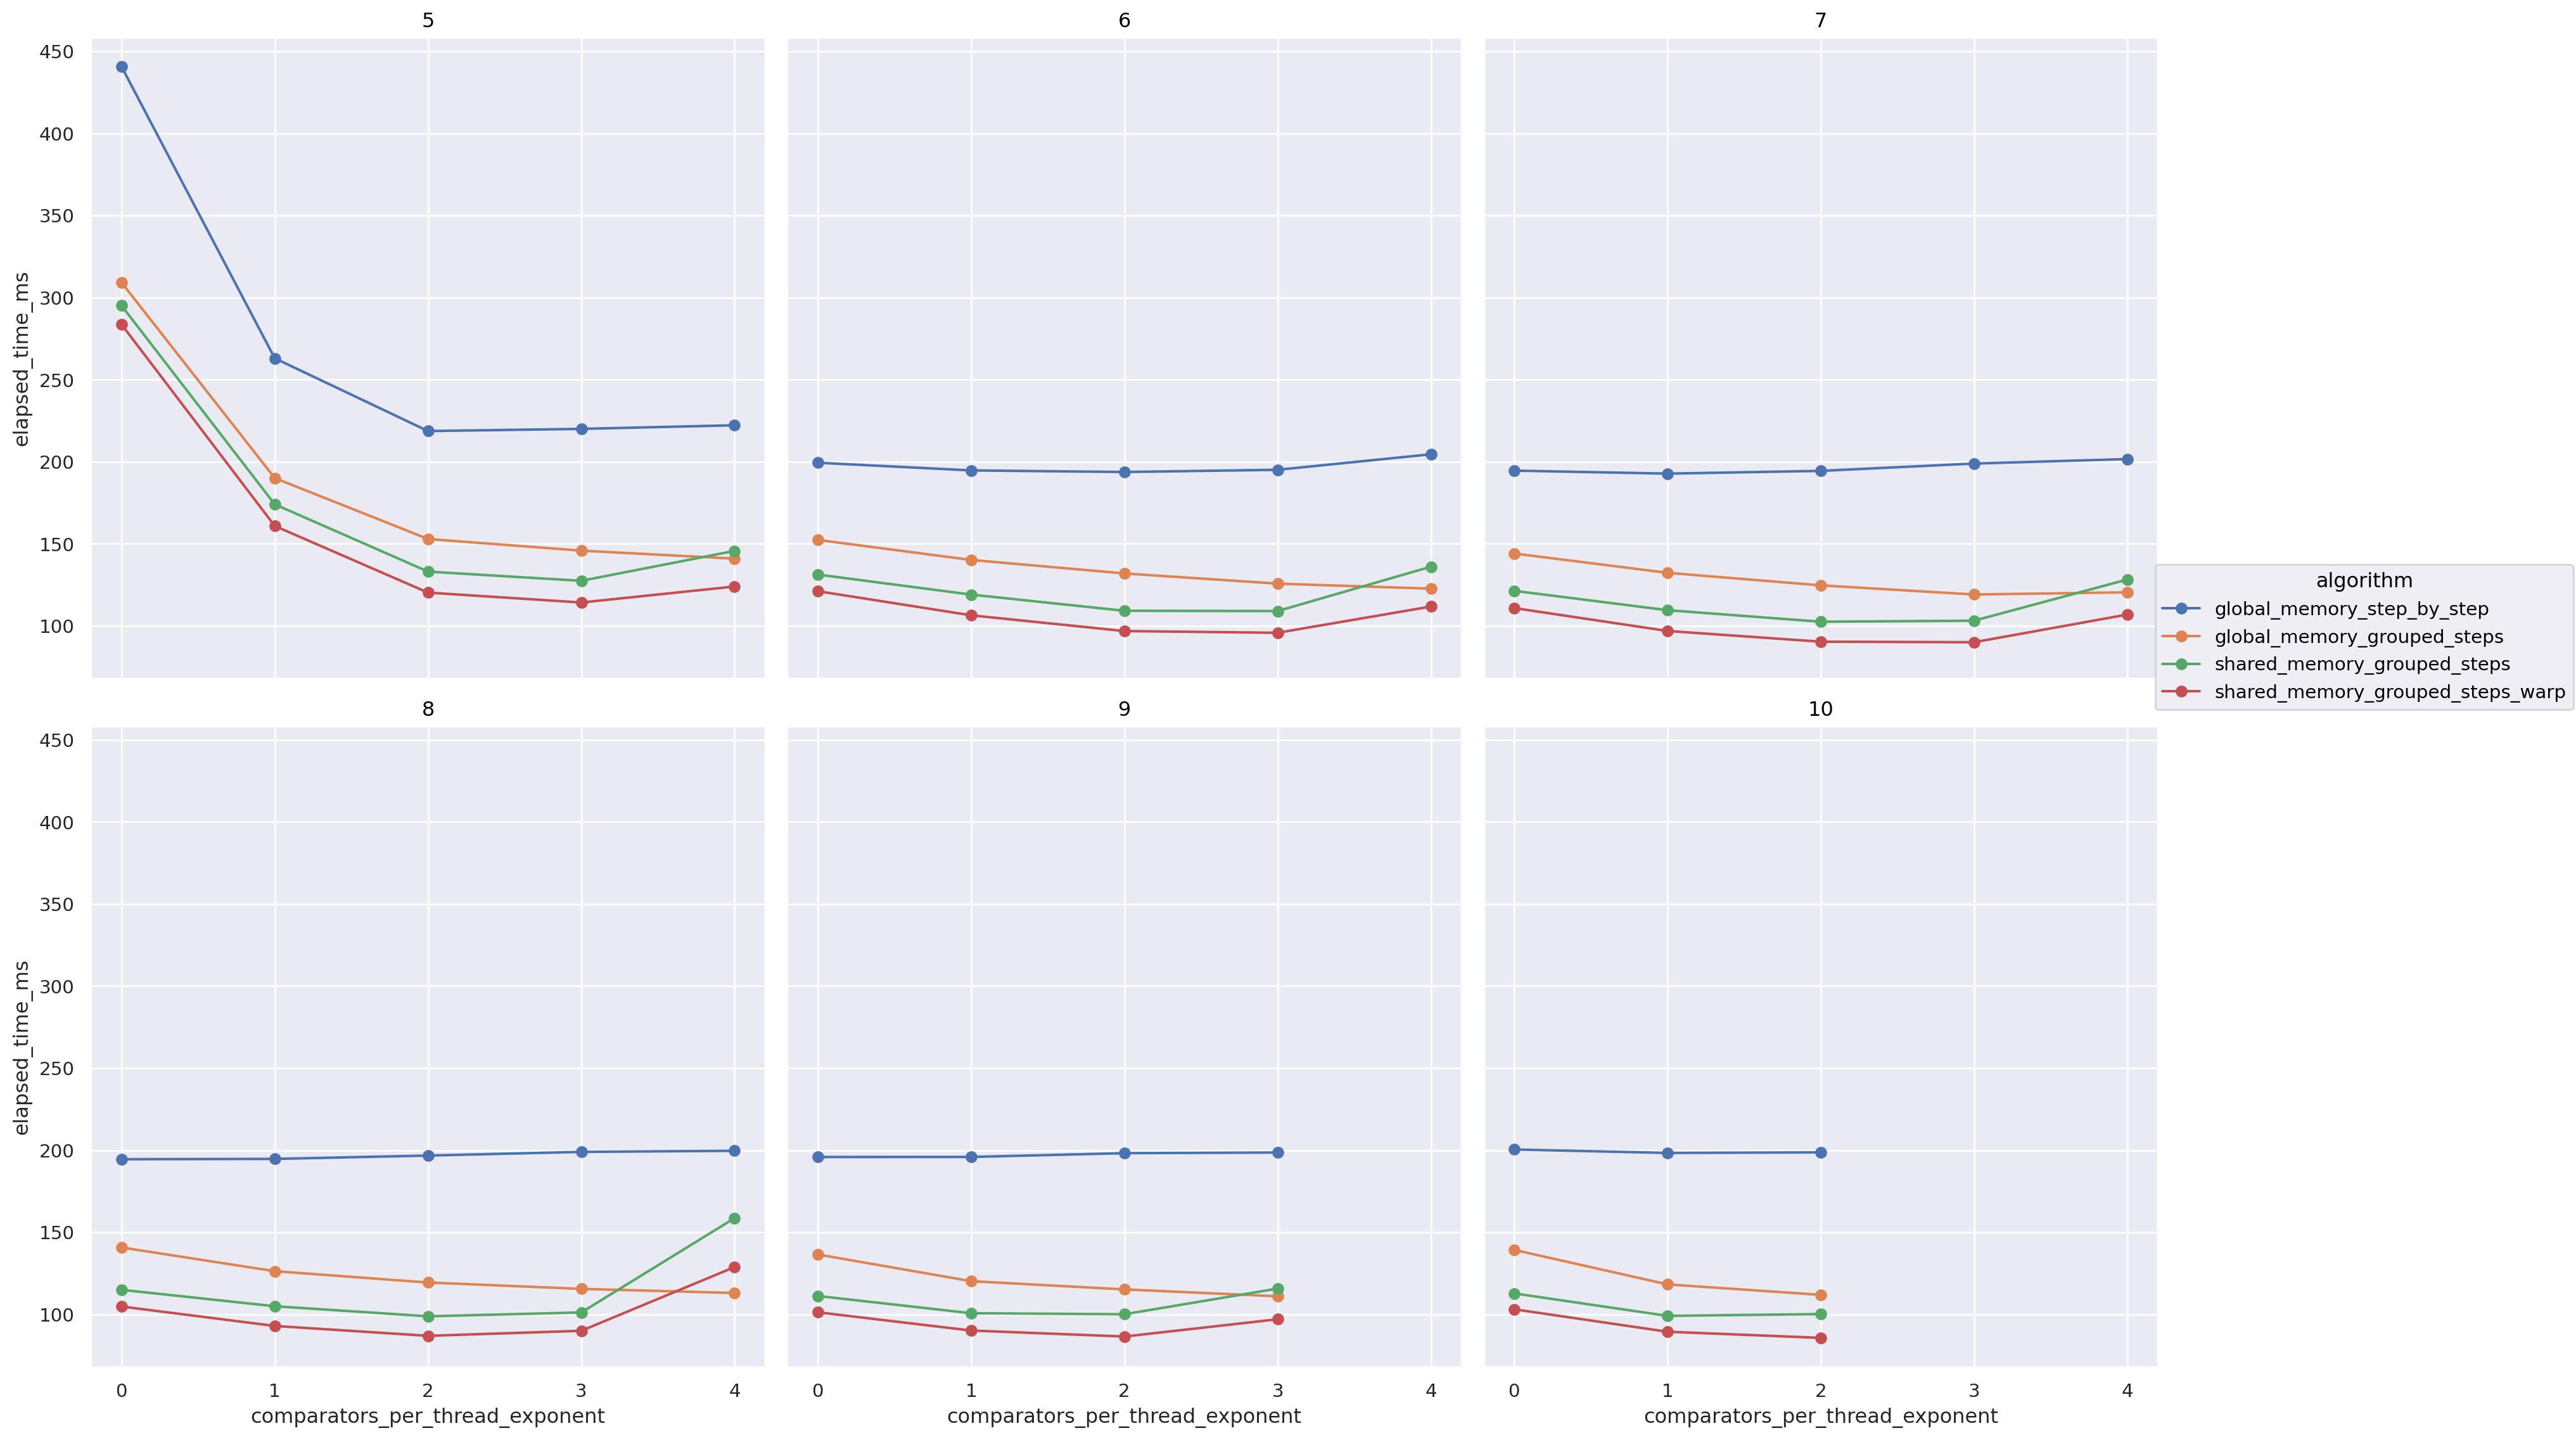

In [20]:
(
    so.Plot(
        gpu_exec_df[gpu_exec_df["vector_size_exponent"] == 26],
        x="comparators_per_thread_exponent",
        y="elapsed_time_ms",
        color="algorithm"
    )
    .facet(col="threads_per_block_exponent", wrap=3)
    # .share(y=False)
    .layout(size=(18, 12))
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

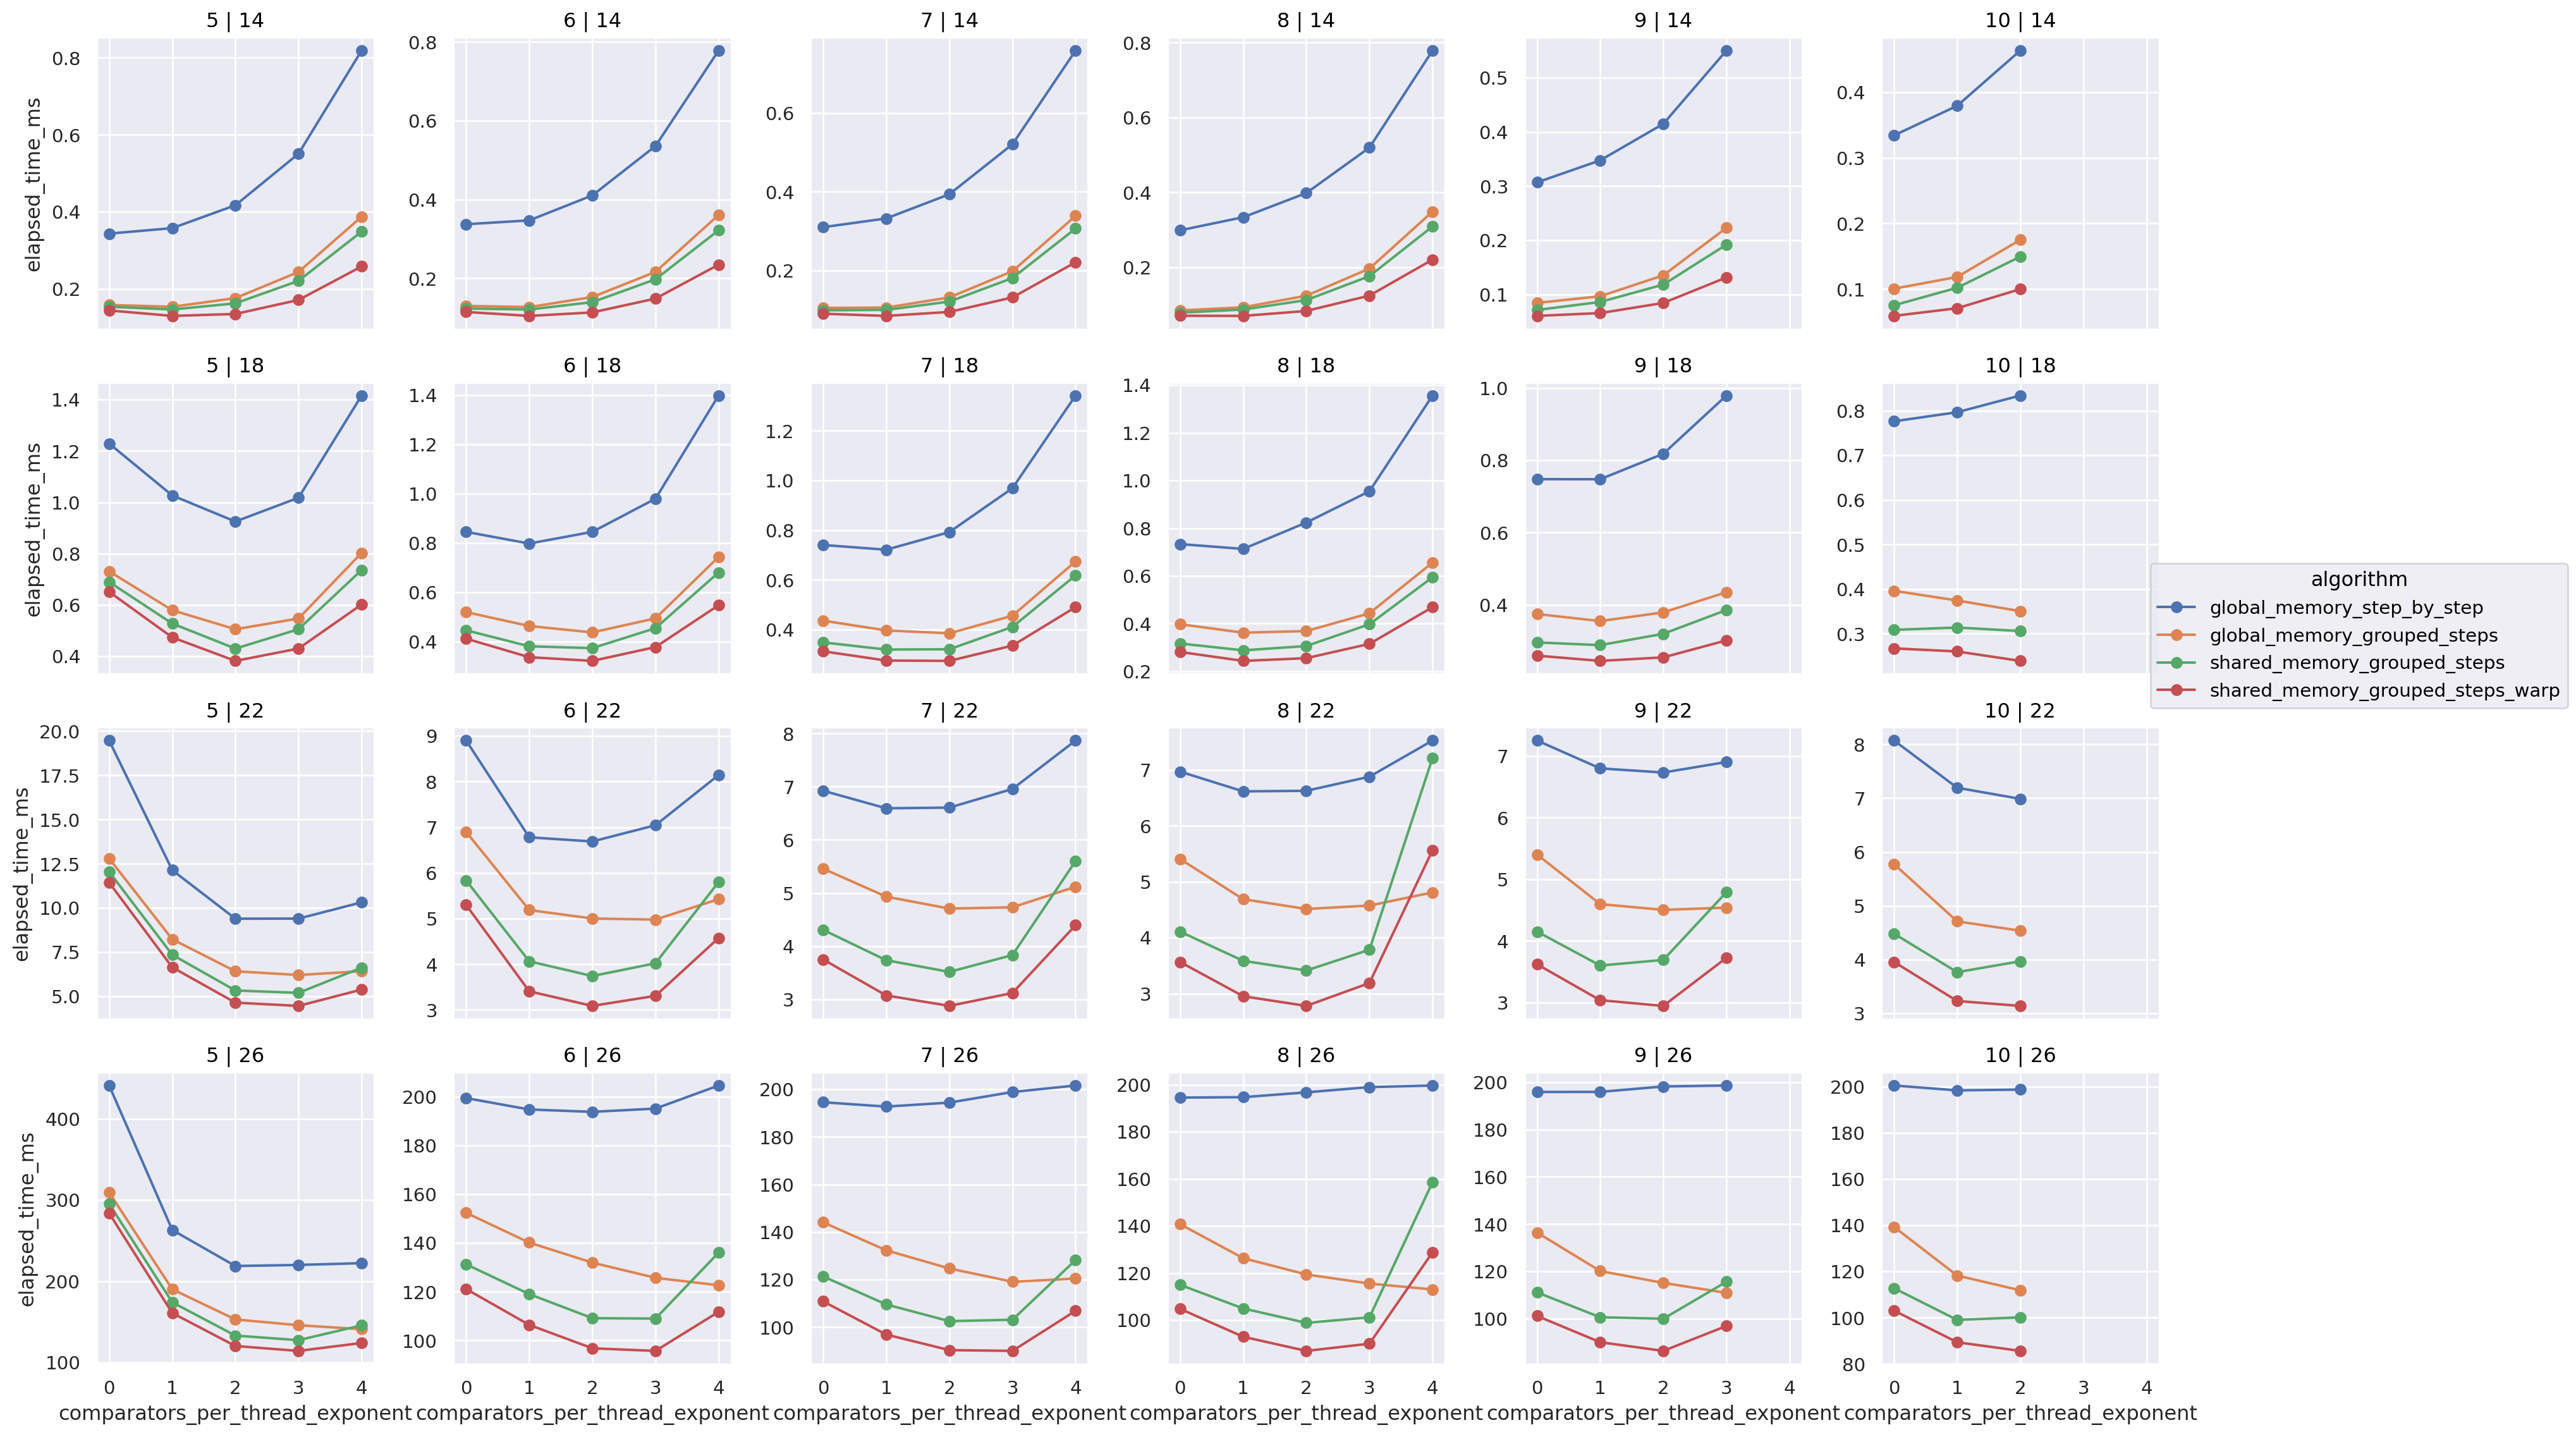

In [21]:
(
    so.Plot(
        gpu_exec_df[gpu_exec_df["vector_size_exponent"].isin([14, 18, 22, 26])],
        x="comparators_per_thread_exponent",
        y="elapsed_time_ms",
        color="algorithm"
    )
    .facet(row="vector_size_exponent", col="threads_per_block_exponent")
    .share(y=False)
    .layout(size=(18, 12))
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

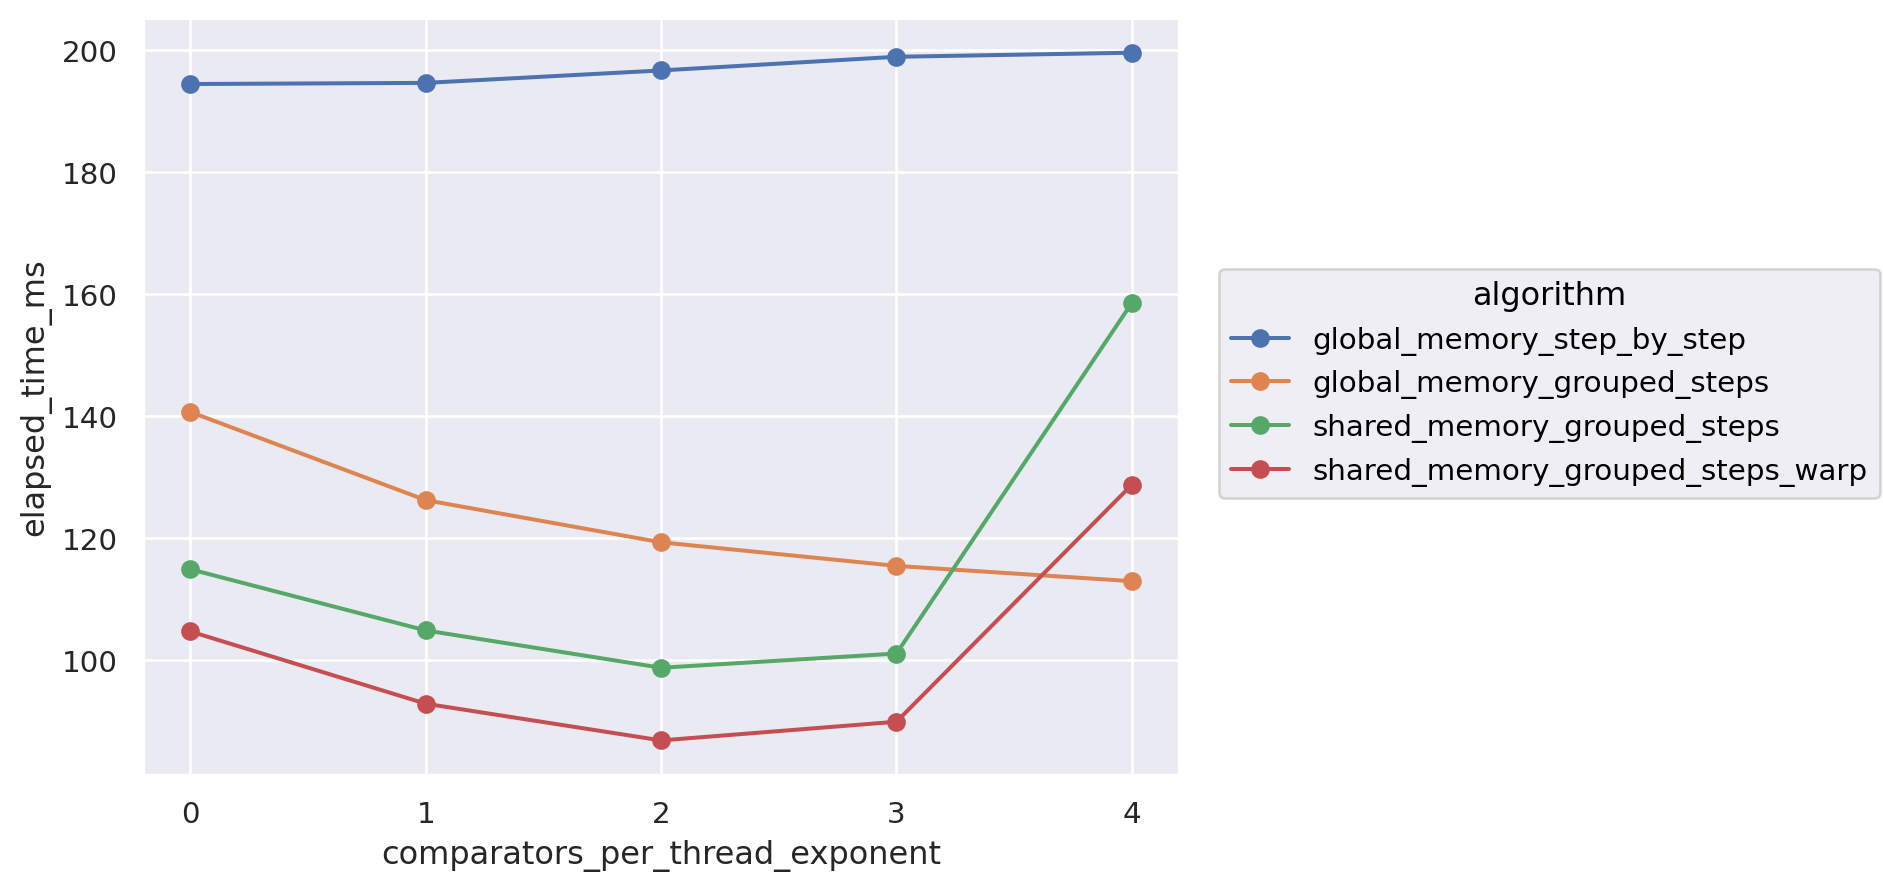

In [22]:
# effects of the number of comparators per thread (as it grows it gets better, but for bigger number of
# threads per block there is not enough shared memory in each block to execute the kernel)
(
    so.Plot(
        gpu_exec_df[
            (gpu_exec_df["vector_size_exponent"] == 26)
            & (gpu_exec_df["threads_per_block_exponent"] == 8)
        ],
        x="comparators_per_thread_exponent",
        y="elapsed_time_ms",
        color="algorithm"
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

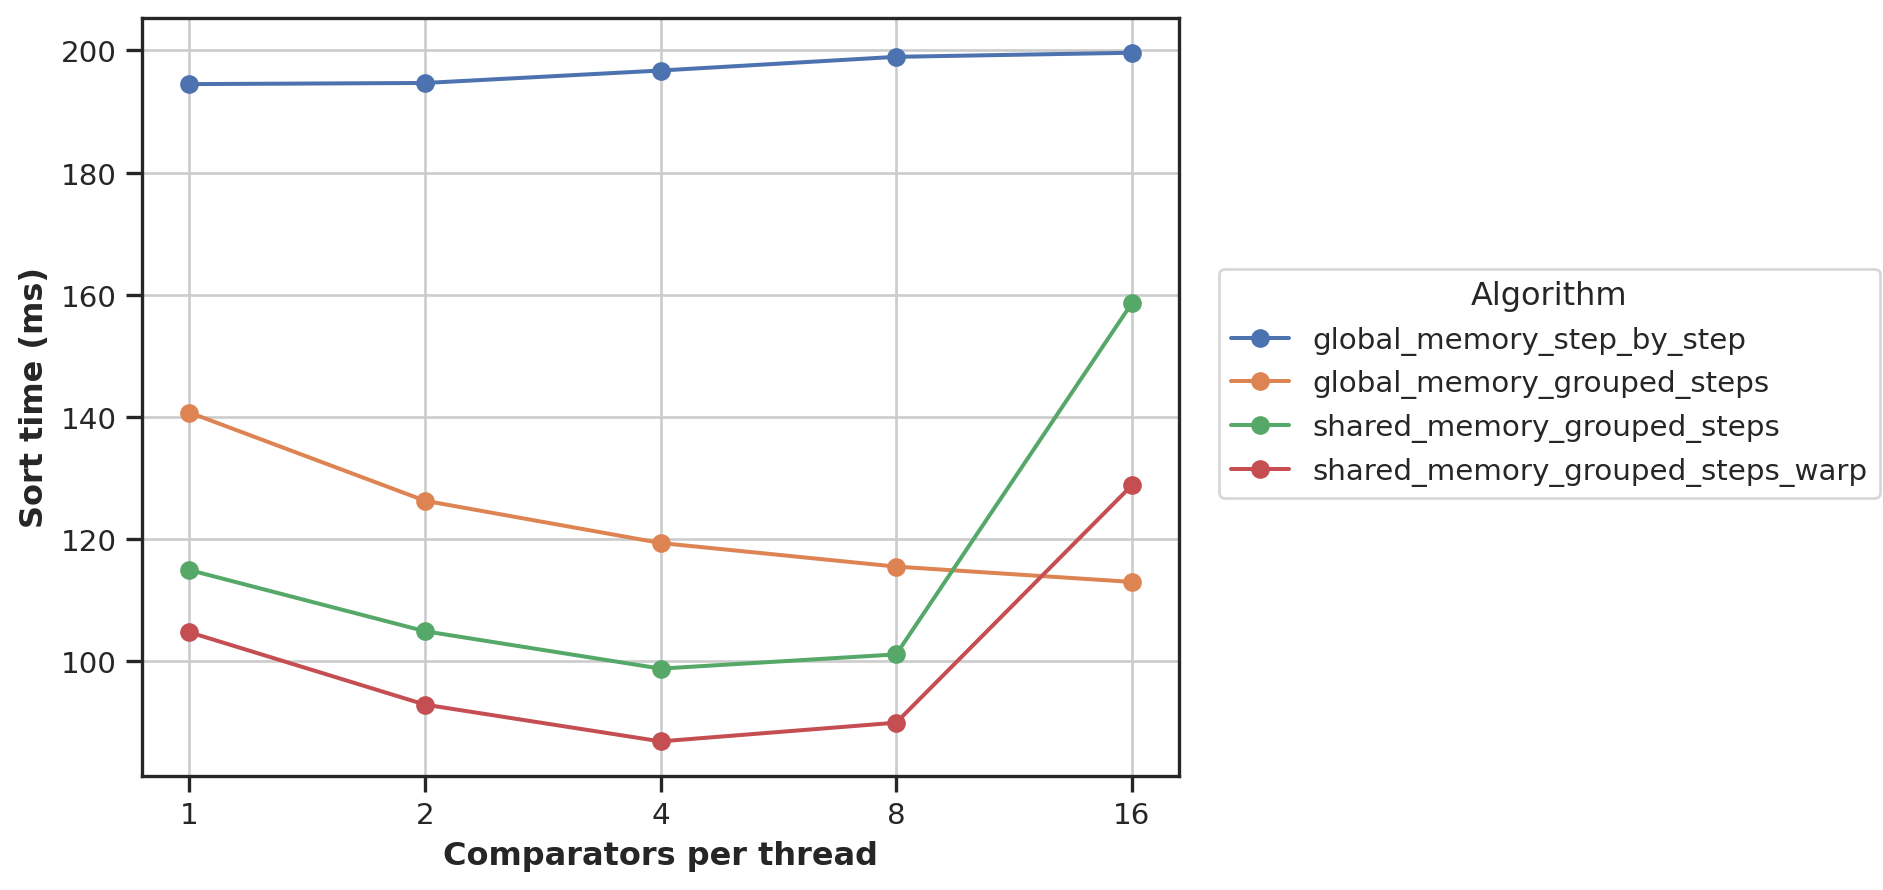

In [23]:
# effects of the number of comparators per thread (as it grows it gets worse, but for bigger number of
# threads per block there is not enough shared memory in each block to execute the kernel)
(
    so.Plot(
        gpu_exec_df[
            (gpu_exec_df["vector_size_exponent"] == 26)
            & (gpu_exec_df["threads_per_block_exponent"] == 8)
        ],
        x="comparators_per_thread_exponent",
        y="elapsed_time_ms",
        color="algorithm"
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1).label(like=lambda x, pos: int(2**x)),
    )
    .label(
        x="Comparators per thread",
        y="Sort time (ms)",
        color="Algorithm",
    )
    .theme(theme_dict)
    .save("plot6_gpu_implementations-comparators_per_thread.svg", bbox_inches='tight')
)

# LIB implementations

In [24]:
algorithms = [
    "thrust_sort",
    "cub_merge_sort",
    "cub_radix_sort",
]

dfs = []
for algorithm in algorithms:
    df = pd.read_csv(f"{CSV_PATH}/{algorithm}.csv")
    df["algorithm"] = algorithm

    dfs.append(df)

lib_exec_df = pd.concat(dfs)
lib_exec_df

vector_size_exponent  repetition  elapsed_time_ms       algorithm
0                     11           1          2.48320     thrust_sort
1                     11           2          2.47296     thrust_sort
2                     11           3          2.47091     thrust_sort
3                     11           4          2.47398     thrust_sort
4                     11           5          2.48218     thrust_sort
..                   ...         ...              ...             ...
95                    30           1        118.25300  cub_radix_sort
96                    30           2        109.99200  cub_radix_sort
97                    30           3        115.09200  cub_radix_sort
98                    30           4        122.49200  cub_radix_sort
99                    30           5        110.43700  cub_radix_sort

[265 rows x 4 columns]

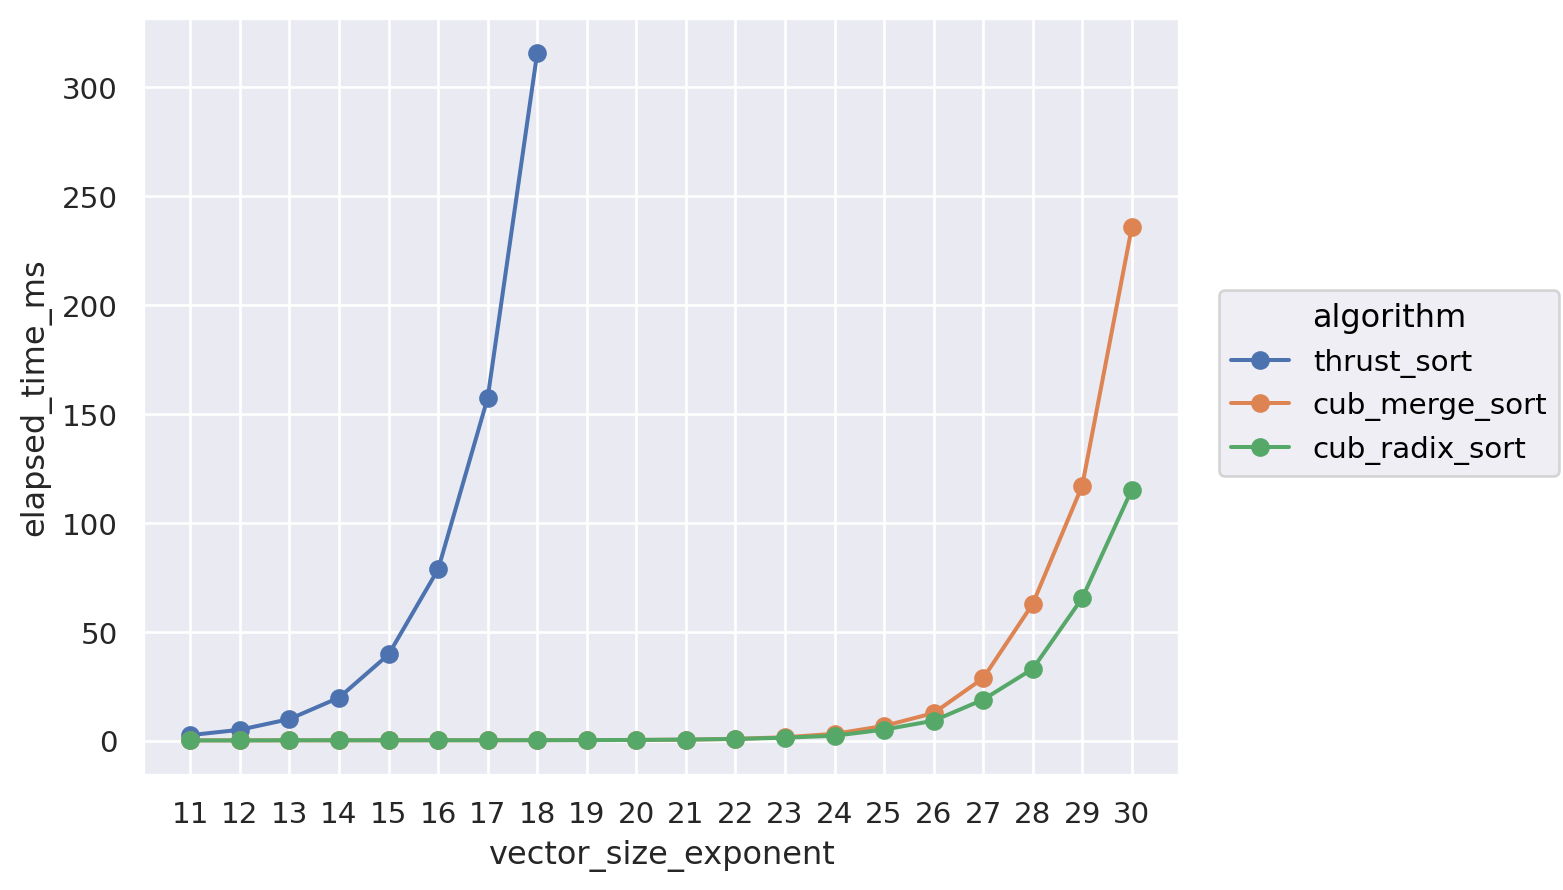

In [25]:
(
    so.Plot(
        # lib_exec_df,
        lib_exec_df[
            (lib_exec_df["algorithm"] != "thrust_sort")
            | (lib_exec_df["vector_size_exponent"] <= 18)
        ],
        x="vector_size_exponent",
        y="elapsed_time_ms",
        color="algorithm"
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1),
    )
)

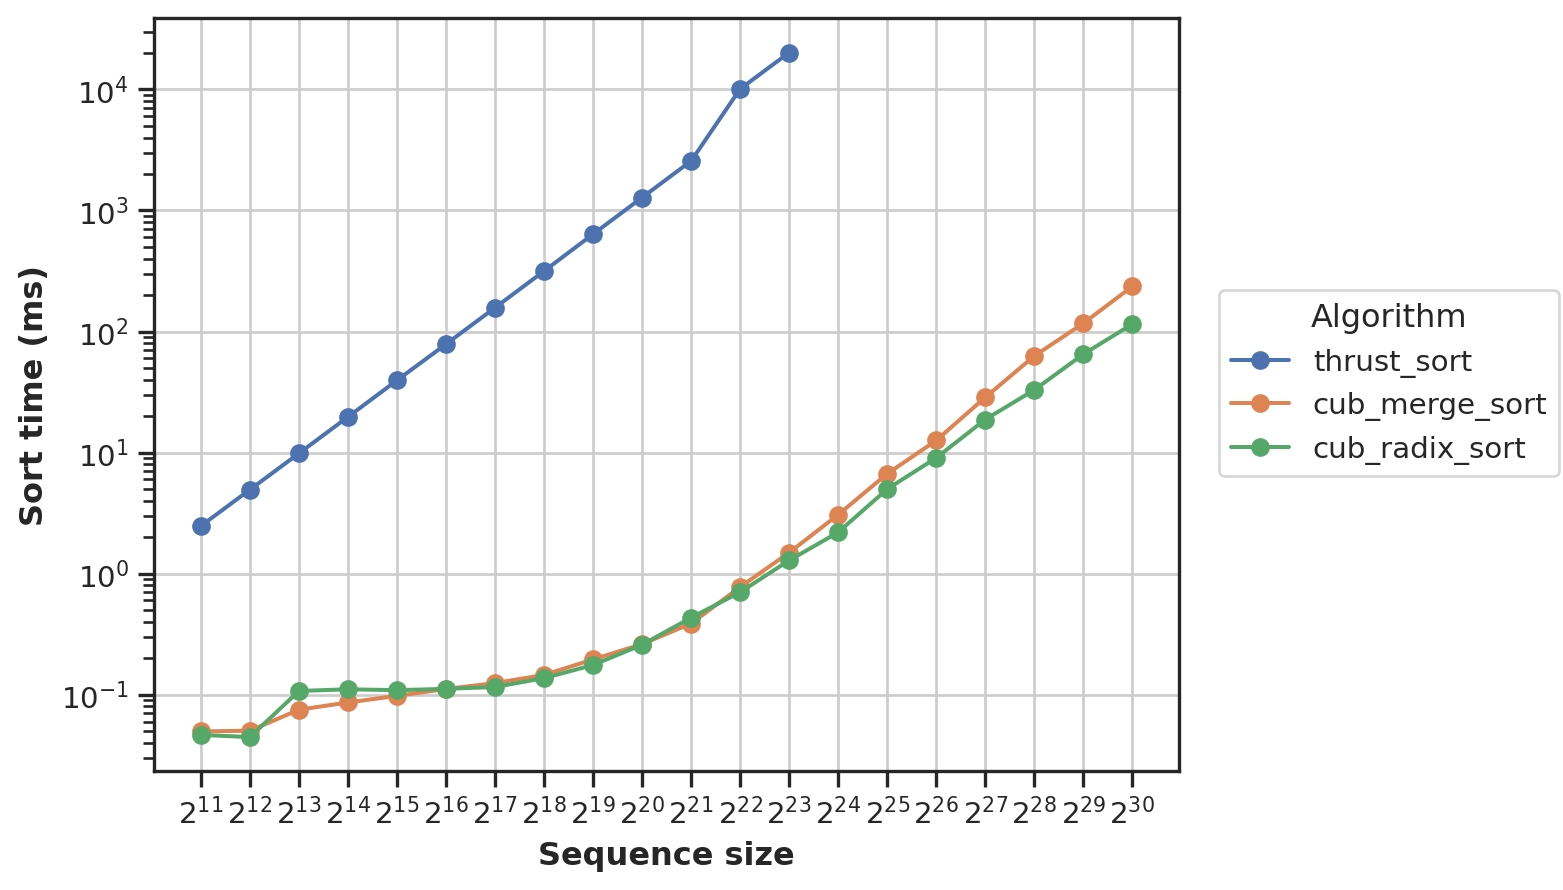

In [26]:
(
    so.Plot(
        lib_exec_df,
        x="vector_size_exponent",
        y="elapsed_time_ms",
        color="algorithm"
    )
    .add(so.Line(marker="o"), so.Agg())
    .scale(
        x=so.Continuous().tick(every=1).label(like="$2^{{{x:.0f}}}$"),
        y="log",
        # y="symlog",
    )
    .label(
        x="Sequence size",
        y="Sort time (ms)",
        color="Algorithm",
    )
    .theme(theme_dict)
    .save("plot7_lib_implementations.svg", bbox_inches='tight')
)